# Проект. Исследование стартапов

- <font color='#777778'>Автор:</font> *Наталья Мартынова*

- <font color='#777778'>Дата:</font> *22 октября 2025 г.*

## Введение

Заказчиком исследования является финансовая компания, работающая с венчурными инвестициями. Заказчик хочет понять закономерности финансирования стартапов и оценить перспективы выхода на рынок с покупкой и развитием компаний. 

### Цели и задачи проекта

<font color='#777778'>Цель:</font> провести исследовательский анализ компаний, объёмов и типов привлечённых инвестиций, статистики по возвратам средств на основе исторических данных.

<font color='#777778'>Задачи:</font> 
- подготовить датасет к работе;
- исследовать динамику и структуру финансирования стартапов;
- ответить на вопросы, важные для оценки инвестиционных стратегий.

## Шаг 1. Знакомство с данными: загрузка и предобработка

Датасет получен из базы данных стартапов.

Название основного датасета — `cb_investments.zip`. Внутри архива один файл — `cb_investments.csv`.

Описание данных:
* `name` — название компании.
* `homepage_url` — ссылка на сайт компании.
* `category_list` — категории, в которых работает компания. Указываются через `|`.
* `market` — основной рынок или отрасль компании.
* `funding_total_usd` — общий объём привлечённых инвестиций в долларах США.
* `status` — текущий статус компании, например `operating`, `closed` и так далее.
* `country_code` — код страны, например USA.
* `state_code` — код штата или региона, например, CA.
* `region` — регион, например, SF Bay Area.
* `city` — город, в котором расположена компания.
* `funding_rounds` — общее число раундов финансирования.
* `participants` — число участников в раундах финансирования.
* `founded_at` — дата основания компании.
* `founded_month` — месяц основания в формате `YYYY-MM`.
* `founded_quarter` — квартал основания в формате `YYYY-QN`.
* `founded_year` — год основания.
* `first_funding_at` — дата первого финансирования.
* `mid_funding_at` — дата среднего по времени раунда финансирования.
* `last_funding_at` — дата последнего финансирования.
* `seed` — сумма инвестиций на посевной стадии.
* `venture` — сумма венчурных инвестиций.
* `equity_crowdfunding` — сумма, привлечённая через долевой краудфандинг.
* `undisclosed` — сумма финансирования нераскрытого типа.
* `convertible_note` — сумма инвестиций через конвертируемые займы.
* `debt_financing` — сумма долгового финансирования.
* `angel` — сумма инвестиций от бизнес-ангелов.
* `grant` — сумма полученных грантов.
* `private_equity` — сумма инвестиций в виде прямых (частных) вложений.
* `post_ipo_equity` — сумма финансирования после IPO.
* `post_ipo_debt` — сумма долгового финансирования после IPO.
* `secondary_market` — сумма сделок на вторичном рынке.
* `product_crowdfunding` — сумма, привлечённая через продуктовый краудфандинг.
* `round_A` — `round_H` — сумма инвестиций в соответствующем раунде.

Название дополнительного датасета — `cb_returns.csv`. Он содержит суммы возвратов по типам финансирования в миллионах долларов по годам.

Описание данных:
* `year` — год возврата средств.
* `seed` — сумма возвратов от посевных инвестиций.
* `venture` — сумма возвратов от венчурных инвестиций.
* `equity_crowdfunding` — сумма, возвращённая по долевому краудфандингу.
* `undisclosed` — сумма возвратов нераскрытого типа.
* `convertible_note` — сумма возвратов через конвертируемые займы.
* `debt_financing` — сумма возвратов от долгового финансирования.
* `angel` — сумма возвратов бизнес-ангелам.
* `grant` — сумма возвратов по грантам.
* `private_equity` — сумма возвратов прямых (частных) вложений.
* `post_ipo_equity` — сумма возвратов от IPO.
* `post_ipo_debt` — сумма возвратов от долгового IPO.
* `secondary_market` — сумма возвратов от сделок на вторичном рынке.
* `product_crowdfunding` — сумма возвратов по продуктовому краудфандингу.

Файлы находятся в папке `datasets`, если вы выполняете работу на платформе. В случае, если вы делаете работу локально, доступ к файлам в папке можно получить по адресу `https://code.s3.yandex.net/datasets/` + имя файла.

### Вывод общей информации

Загрузите необходимые для работы библиотеки.

Совет: если вы неоднократно используете какой-либо код, вынесите его в начало проекта в виде функций.

Импортируем библиотеки, которые потребуются нам в проекте, и загрузим данные из файлов:

In [1]:
# Загружаем библиотеки
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Функция, которую мы будем использовать для оценки пропусков в датафрейме
def show_missing_stats(tmp0):
    """
    Функция для отображения статистики пропущенных значений в датафрейме.
    """
    missing_stats = pd.DataFrame({
        'Кол-во пропусков': tmp0.isnull().sum(),
        'Доля пропусков': tmp0.isnull().mean()
    })
    missing_stats = missing_stats[missing_stats['Кол-во пропусков'] > 0]
    
    if missing_stats.empty:
        return "Пропусков в данных нет"
    
    # Форматируем при выводе через Styler
    return (missing_stats.style.format({'Доля пропусков': '{:.4f}'}).background_gradient(cmap='coolwarm'))

In [3]:
# Выгружаем данные с сервера
cb_investments_df = pd.read_csv("https://code.s3.yandex.net/datasets/cb_investments.zip", sep=';', low_memory=False)
cb_returns_df = pd.read_csv("https://code.s3.yandex.net/datasets/cb_returns.csv")

In [4]:
# Проверяем основной детафрейм, выгруженный  из архива
cb_investments_df.head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_A,round_B,round_C,round_D,round_E,round_F,round_G,round_H
0,Harvard University,http://harvard.edu,|Education|,Education,"9,00,00,000",operating,USA,MA,Boston,Cambridge,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,University of New Brunswick,http://www.unb.ca,NaN,NaN,"20,00,000",operating,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,DuPont,http://www.dupont.com,|Business Services|Agriculture|Automotive|Inve...,Business Services,"90,00,000",operating,USA,DE,"Wilmington, Delaware",Wilmington,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,University of Michigan,http://www.umich.edu/,|Education|,Education,"77,00,000",operating,USA,MI,Detroit,Ann Arbor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Case Western Reserve University,http://www.case.edu,|Education|,Education,"5,40,000",operating,USA,OH,Cleveland,Cleveland,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Проверяем, как загрузился второй датафрейм
cb_returns_df.head()

,year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
0,2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
1,2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2,2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
3,2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
4,2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


Оба файла успешно выгружены. Теперь можно вывести обзорную информацию по ним для принятия решений о предобработке.

In [6]:
# Выведем общую информацию о содержимом первой основной таблицы
cb_investments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   name                  49437 non-null  object 
 1   homepage_url          45989 non-null  object 
 2   category_list         45477 non-null  object 
 3    market               45477 non-null  object 
 4    funding_total_usd    49438 non-null  object 
 5   status                48124 non-null  object 
 6   country_code          44165 non-null  object 
 7   state_code            30161 non-null  object 
 8   region                44165 non-null  object 
 9   city                  43322 non-null  object 
 10  funding_rounds        49438 non-null  float64
 11  participants          30473 non-null  float64
 12  founded_at            38554 non-null  object 
 13  founded_month         38482 non-null  object 
 14  founded_quarter       38482 non-null  object 
 15  founded_year       

In [7]:
# Обращаемся к пользовательской функции для оценки пропусков в первом датафрейме
show_missing_stats(cb_investments_df)

,Кол-во пропусков,Доля пропусков
name,4857,0.0895
homepage_url,8305,0.1530
category_list,8817,0.1624
market,8817,0.1624
funding_total_usd,4856,0.0894
status,6170,0.1136
country_code,10129,0.1866
state_code,24133,0.4445
region,10129,0.1866
city,10972,0.2021


Датасет `cb_investments_df` содержит 54294 строк и 40 столбцов с исторической информацией о компаниях-стартапах. Все столбцы датафрейма содержат пропуски. 24 столбца содержат данные типа `float64`, 16 столбцов - данные типа `object`.

Названия столбцов все соответствуют по смыслу содержимому в них. 

В столбцах `market` и `funding_total_usd` в названиях в начале строки - пробелы. Столбцы с раундами финансирования содержат заглавные буквы. Нужно нормализовать названия этих столбцов.  

В остальных столбцах переименование или преобразование формата написания не требуются.

В столбцах `funding_total_usd`, `seed`, `venture`, `equity_crowdfunding`, `undisclosed`, `convertible_note`, `debt_financing`, `angel`, `grant`, `private_equity`, `post_ipo_equity`, `post_ipo_debt`, `secondary_market`, `product_crowdfunding` и `round_A` — `round_H` содержится информция о суммах в долларах - тип данных `float` подходящий, но можно понизить разрядность в столбцах до `float32` для оптимизации ресурсов (после обработки пропусков).

Столбцы `funding_rounds` и `participants` загрузились в тип `float64`, но содержат по смыслу целочисленные значения. Нужно будет в этом убедиться и после обработки пропусков, возможно, преобразовать тип на `int16` (перед этим проверить диапазон значений в столбце).

Столбцы `founded_at`, `founded_month`, `first_funding_at`, `mid_funding_at` и `last_funding_at` содержат даты, а загрузились они с типом `object`. Нужно будет посмотреть, как именно записаны даты, обработать пропуски и, возможно, заменить тип на временной.

В столбце `founded_year` содержатся года, но тип данных `float64`, так как есть пропуски. Нужно обработать пропуски и привозможность преобразовать тип к `int16`. 

Таким образом, в 29-ти из 40 столбцов можно оптимизировать тип данных. 

А теперь сделаем обзор содержимого второго датасета `cb_returns_df`:

In [8]:
# Выведем общую информацию о содержимом второй таблицы
cb_returns_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  15 non-null     int64  
 1   seed                  15 non-null     float64
 2   venture               15 non-null     float64
 3   equity_crowdfunding   15 non-null     float64
 4   undisclosed           15 non-null     float64
 5   convertible_note      15 non-null     float64
 6   debt_financing        15 non-null     float64
 7   angel                 15 non-null     float64
 8   grant                 15 non-null     float64
 9   private_equity        15 non-null     float64
 10  post_ipo_equity       15 non-null     float64
 11  post_ipo_debt         15 non-null     float64
 12  secondary_market      15 non-null     float64
 13  product_crowdfunding  15 non-null     float64
dtypes: float64(13), int64(1)
memory usage: 1.8 KB


In [9]:
# Обращаемся к пользовательской функции для оценки пропусков во втором датафрейме
show_missing_stats(cb_returns_df)

'Пропусков в данных нет'

Датафрейм `cb_returns_df` содержит 15 строк и 14 столбцов, в которых содержится информация о суммах возвратов по типам финансирования в миллионах долларов по годам. Пропусков в столбцах нет. 13 столбцов имеют тип `float64`, 1 столбец - тип `int64`.

Названия столбцов все соответствуют по смыслу содержимому в них и введены в принятом в Python за норму формате snake_case, значит переименовывать столбцы и преобразовывать формат написания названий не требуется.

В столбце `year` содержится год в типе данных `int64` - его можно оптимизировать до `int64`.

В столбцах `seed`, `venture`, `equity_crowdfunding`, `undisclosed`, `convertible_note`, `debt_financing`, `angel`, `grant`, `private_equity`, `post_ipo_equity`, `post_ipo_debt`, `secondary_market`, `product_crowdfunding` - то есть во всех, кроме первого, — содержатся суммы в долларах во `float64`. Их все можно оптимизировать до `float32`.

Итого, во всех 14-ти столбцах второго датафрейма можно оптимизировать тип данных, пропусков в этом датафрейме нет - они не помешают преобразованию типов.

---

<b>Вывод о полученных данных:<b>

- В первом датефрейме нужно нормализовать названия десяти столбцов - убрать пробелы в начале строки, заглавные буквы сделать прописными.
- Названия остальных столбцов и формат их написания в обоих датасетах корректировки не требует.
- Пропуски присутствуют во всех 40 столбцах первого датасета. Во втором их нет.
- Тип данных можно сразу преобразовать во всех 14-ти столбцах второго датасета. В первом - в 29-ти из 40 столбцов можно оптимизировать тип данных (но нужно помнить о пропусках в них).
- Два датафрейма напрямую через какой-то из столбцов не связаны, их соединение на первый взгляд не требуется. 

### Предобработка данных

Проверьте названия столбцов в датасетах: все ли они точно отражают содержимое данных и оформлены в удобном для работы стиле. При необходимости приведите их к единому аккуратному стилю.

In [10]:
# Перед началом предобработки создаем копии датасетов для возможности проверить сделанные изменения после предобработки
temp1 = cb_investments_df.copy()
temp2 = cb_returns_df.copy()
print (f"Количество строк в первом датасете до преобразований: {len(temp1)}")
print (f"Количество строк во втором датасете до преобразований: {len(temp2)}")

Количество строк в первом датасете до преобразований: 54294
Количество строк во втором датасете до преобразований: 15


В первом датефрейме нужно нормализовать названия двух столбцов - убрать пробелы в начале строки. Вначале убедимся, что пробелы действительно имеют место:

In [11]:
# Выведем названия столбцов до переименования
print(f"Названия столбцов до переименования: {cb_investments_df.columns}")

Названия столбцов до переименования: Index(['name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'participants', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')


Пробелы, действительно присутствуют в названиях этих двух столбцов, но не только в начале, но и в конце строки. Пробелы в конце строки после метода .info() можно не обнаружить - стоит проверить и названия второго датасета на эту проблему. Но сначала уберём лишние пробелы в первом и сделаем прописными все буквы в названиях раундов:

In [12]:
# Переименовываем столбцы
cb_investments_df = cb_investments_df.rename(columns={' market ': 'market', 
                                                      ' funding_total_usd ': 'funding_total_usd',
                                                      'round_A': 'round_a',
                                                      'round_B': 'round_b',
                                                      'round_C': 'round_c',
                                                      'round_D': 'round_d',
                                                      'round_E': 'round_e',
                                                      'round_F': 'round_f',
                                                      'round_G': 'round_g',
                                                      'round_H': 'round_h'})

# Выведем названия столбцов после переименования
print(f"Названия столбцов после переименования: {cb_investments_df.columns}")

Названия столбцов после переименования: Index(['name', 'homepage_url', 'category_list', 'market', 'funding_total_usd',
       'status', 'country_code', 'state_code', 'region', 'city',
       'funding_rounds', 'participants', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at', 'mid_funding_at',
       'last_funding_at', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_a', 'round_b',
       'round_c', 'round_d', 'round_e', 'round_f', 'round_g', 'round_h'],
      dtype='object')


Теперь пробелы не будут мешать обратиться к столбцам, а названия раундов соответствуют  snake_case. Теперь проверим названия столбцов во втором датасете на лишние пробелы:

In [13]:
print(f"Названия столбцов во втором датасете: {cb_returns_df.columns}")

Названия столбцов во втором датасете: Index(['year', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed',
       'convertible_note', 'debt_financing', 'angel', 'grant',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding'],
      dtype='object')


Тут нет проблемы пробелов, можем двигаться дальше. 

Уберём в столбце `funding_total_usd` выделение разрядов и приведём его к числовому типу. Сейчас это строки с запятыми, сначала уберём запятые, затем преобразуем тип на тип с плавающей точкой:

In [14]:
# Для самоконтроля выводим голову столбца до преобразования
print(f"Значения в столбце до удаления запятых: \n{cb_investments_df['funding_total_usd'].head()}")

# В цикле перебираем ячейки столбца funding_total_usd и удаляем из них запятые
# for i in range(len(cb_investments_df)):
    # if pd.notna(cb_investments_df.loc[i, 'funding_total_usd']): # Пропускаем пропуски, их метод .replace не "переваривает"
        # cb_investments_df.loc[i, 'funding_total_usd'] = cb_investments_df.loc[i, 'funding_total_usd'].replace(',', '')
    # else:
        # continue 

# Цикл очень медлено работает, для удобства воспользуюсь предложением кода без цикла от YGPT
cb_investments_df['funding_total_usd'] = cb_investments_df['funding_total_usd'].apply(lambda x: x.replace(',', '') if pd.notna(x) else x)

# Для самоконтроля выводим голову столбца после преобразования
print(f"Значения в столбце после удаления запятых: \n{cb_investments_df['funding_total_usd'].head()}")

Значения в столбце до удаления запятых: 
0     9,00,00,000 
1       20,00,000 
2       90,00,000 
3       77,00,000 
4        5,40,000 
Name: funding_total_usd, dtype: object
Значения в столбце после удаления запятых: 
0     90000000 
1      2000000 
2      9000000 
3      7700000 
4       540000 
Name: funding_total_usd, dtype: object


Запятые удалены, теперь можем преобразовать тип (не забывая о пропусках):

In [15]:
# Преобразовываем тип на числовой
# В случае значений, которые не являются числами, заменяем их на пропуски
cb_investments_df['funding_total_usd'] = pd.to_numeric(cb_investments_df['funding_total_usd'], errors='coerce')

# Выводим голову столбца для проверки корректности преобразования
cb_investments_df['funding_total_usd'].head()

0    90000000.0
1     2000000.0
2     9000000.0
3     7700000.0
4      540000.0
Name: funding_total_usd, dtype: float64

Мы видим, что тип данных в столбце изменился на числовой с плавающей точкой (так как в столбце присутствуют пропуски).

Обработаем типы данных в столбцах, которые хранят значения даты и времени. Таких столбцов в первом датасете 5, в них всех есть пропуски. Сначала нам нужно узнать, в каком виде записаны данные в этих столбцах. Выведем их головы и проанализируем:

In [16]:
# Выводим головы столбцов с датами
for column in ['founded_at', 'founded_month', 'first_funding_at', 'mid_funding_at', 'last_funding_at']:
    print(f"{column}:\n{cb_investments_df[column].head()}\n")

founded_at:
0    1636-09-08
1    1785-01-01
2    1802-07-19
3    1817-01-01
4    1826-01-01
Name: founded_at, dtype: object

founded_month:
0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: founded_month, dtype: object

first_funding_at:
0    2014-01-06
1    2014-05-15
2    2009-07-02
3    2013-11-21
4    2014-01-14
Name: first_funding_at, dtype: object

mid_funding_at:
0           NaN
1           NaN
2    2009-07-02
3    2013-11-21
4           NaN
Name: mid_funding_at, dtype: object

last_funding_at:
0    2014-01-06
1    2014-05-15
2    2009-07-02
3    2014-11-03
4    2014-01-14
Name: last_funding_at, dtype: object



Во всех, кроме founded_month (им займёмся отдельно чуть позже) формат записи даты одинаковый - используем его при преобразовании типа. 

Но чтобы формат совпал во всех ячейках с данными, перед изменением типа данных нормализуем строки в этих пяти столбцах - уберём лишние пробелы, если они есть:

In [17]:
# Удаляем пробелы в начале и конце строк в столбцах перед преобразованием типа данных
for column in ['founded_at', 'founded_month', 'first_funding_at', 'mid_funding_at', 'last_funding_at']:
    cb_investments_df[column] = cb_investments_df[column].str.strip()

In [18]:
# Выведем информацию о пропусках до обработки столбцов
cb_investments_df[['founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at']].info()

# Перебираем столбцы с датами и преобразовываем тип на временной 
# (в случае ошибки - заменяем значение пропуском)
for column in ['founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at']:
    cb_investments_df[column] = pd.to_datetime(cb_investments_df[column], format='%Y-%m-%d', errors='coerce')
    print(f"{column}:\n{cb_investments_df[column].head()}\n")

# Выведем информацию о пропусках после обработки столбцов
cb_investments_df[['founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54294 entries, 0 to 54293
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   founded_at        38554 non-null  object
 1   first_funding_at  49438 non-null  object
 2   mid_funding_at    30288 non-null  object
 3   last_funding_at   49438 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB
founded_at:
0          NaT
1   1785-01-01
2   1802-07-19
3   1817-01-01
4   1826-01-01
Name: founded_at, dtype: datetime64[ns]

first_funding_at:
0   2014-01-06
1   2014-05-15
2   2009-07-02
3   2013-11-21
4   2014-01-14
Name: first_funding_at, dtype: datetime64[ns]

mid_funding_at:
0          NaT
1          NaT
2   2009-07-02
3   2013-11-21
4          NaT
Name: mid_funding_at, dtype: datetime64[ns]

last_funding_at:
0   2014-01-06
1   2014-05-15
2   2009-07-02
3   2014-11-03
4   2014-01-14
Name: last_funding_at, dtype: datetime64[ns]

<class 'pandas.core.frame.DataFram

Тип данных сменился на `datetime64[ns]` во всех 4-х столбцах. Добавилось несколько пропусков: +1 в `founded_at` и +10 в `first_funding_at`. Относительно размеров датафрейма, это незначительное изменение. Но в случае первой строки в `founded_at` с датой 1636-09-08 не понятно, почему она обработалась как "не дата". Я не смогла выявить причину. У Алисы есть версия: "Дата 1636 может быть вне допустимого диапазона". 

В двух оставшихся столбцах пропусков не прибавилось. 

В датасете `cb_returns` сделайте столбец `year` индексом всего датасета, если не делали это при загрузке.

В датасете `cb_returns` сделаем столбец `year` индексом всего датасета:

In [19]:
# Делаем столбец year индексом
cb_returns_df.set_index('year', inplace=True)

# Проверяем результат 
cb_returns_df.head()

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.70,55.40,0.0,78.21,0.00,8.66,6.43,0.0,0.00,0.94,0.0,0.20,0.0
2001,2.88,23.49,0.0,21.50,0.01,4.49,1.18,0.0,0.00,0.46,0.0,0.46,0.0
2002,6.59,209.42,0.0,25.77,0.02,3.42,3.41,0.0,1.51,0.34,0.0,0.06,0.0
2003,7.74,233.86,0.0,9.40,0.01,1.09,3.41,0.0,1.62,2.11,0.0,0.08,0.0
2004,9.93,555.90,0.0,33.19,0.01,13.55,9.18,0.0,2.19,3.38,0.0,0.55,0.0


Столбец с годом стал индексом датафрейма.

Обработайте текстовые данные, если это необходимо. Пропуски в текстовых столбцах заполните заглушками там, где это понадобится.

Проверим уникальность значений в текстовых столбцах `name`, `homepage_url` и в категориальных `category_list`, `market`, `status`, `country_code`, `state_code`, `region`, `city`. Но сначала нормализуем содержимое ячеек в этих столбцах - приведём строки к нижнему регистру и удалим пробелы в начале и конце строк:

In [20]:
# Выведем содержимое столбцов до нормализации
print(cb_investments_df[['name', 'homepage_url', 'category_list', 'market', 'status', 'country_code', 'state_code', 'region', 'city']].head())

# Делаем написание букв в нижнем регистре и удаляем пробелы в начале и конце строки
for column in ['name', 'homepage_url', 'category_list', 'market', 'status', 'country_code', 'state_code', 'region', 'city']:
    cb_investments_df[column] = cb_investments_df[column].str.lower().str.strip()

# Выведем содержимое столбцов до нормализации для самопроверки
cb_investments_df[['name', 'homepage_url', 'category_list', 'market', 'status', 'country_code', 'state_code', 'region', 'city']].head()

                              name           homepage_url  \
0               Harvard University     http://harvard.edu   
1      University of New Brunswick      http://www.unb.ca   
2                           DuPont  http://www.dupont.com   
3           University of Michigan  http://www.umich.edu/   
4  Case Western Reserve University    http://www.case.edu   

                                       category_list               market  \
0                                        |Education|           Education    
1                                                NaN                  NaN   
2  |Business Services|Agriculture|Automotive|Inve...   Business Services    
3                                        |Education|           Education    
4                                        |Education|           Education    

      status country_code state_code                region        city  
0  operating          USA         MA                Boston   Cambridge  
1  operating          Na

,name,homepage_url,category_list,market,status,country_code,state_code,region,city
0,harvard university,http://harvard.edu,|education|,education,operating,usa,ma,boston,cambridge
1,university of new brunswick,http://www.unb.ca,NaN,NaN,operating,NaN,NaN,NaN,NaN
2,dupont,http://www.dupont.com,|business services|agriculture|automotive|inve...,business services,operating,usa,de,"wilmington, delaware",wilmington
3,university of michigan,http://www.umich.edu/,|education|,education,operating,usa,mi,detroit,ann arbor
4,case western reserve university,http://www.case.edu,|education|,education,operating,usa,oh,cleveland,cleveland


Текстовые столбцы нормализованы. Теперь можно проверить их содержимое на уникальность. Столбец `category_list` содержит сложный список категорий через разделитель. В дальнейшем анализе он не используется, поэтому каких-либо преобразований этих списков делать не будем. Можно оставить его как есть и на уникальность содержимого проверять его нет смысла. 

In [21]:
print(f"Количество строк в датасете: {cb_investments_df.shape[0]}")

# Перебираем столбцы и выводим для каждого количество уникальных значений
for column in ['name', 'homepage_url', 'market', 'status', 'country_code', 'state_code', 'region', 'city']:
    print(f"Количество уникальных значений в {column}: {cb_investments_df[column].nunique()}")

Количество строк в датасете: 54294
Количество уникальных значений в name: 49331
Количество уникальных значений в homepage_url: 45846
Количество уникальных значений в market: 439
Количество уникальных значений в status: 3
Количество уникальных значений в country_code: 115
Количество уникальных значений в state_code: 61
Количество уникальных значений в region: 1089
Количество уникальных значений в city: 4188


В текстовых столбцах `name` и `homepage_url` уникальных значений немного меньше, чем значений без пропусков: в `name` на 106, в `homepage_url` на 143. То есть названия и веб-адреса компаний в датасете повторяются.

В категориальных столбцах мы выяснили количество категорий. 

Обработайте полные дубликаты в данных и пропуски в `funding_total_usd`. избавьтесь от тех строк, которые не несут какой-либо информации либо не содержат данных о финансировании.

Проверим датасеты на полные дубликаты и при их наличии очистим от них данные:

In [22]:
# Проверяем наличие полных дубликатов строк в первом датафрейме
cb_investments_df.duplicated().sum()

4855

In [23]:
# Выведем количество строк датафрейма
print(f'Количество строк до удаления дубликатов: {cb_investments_df.shape[0]}')

# Удалим явные дубликаты (4855 строк)
cb_investments_df = cb_investments_df.drop_duplicates()

#  Выведем для проверки количество строк очищенного датафрейма
print(f'Количество строк после удаления дубликатов: {cb_investments_df.shape[0]}')

Количество строк до удаления дубликатов: 54294
Количество строк после удаления дубликатов: 49439


Разница равна 4855 строк, как и требовалось.

In [24]:
# Проверяем наличие полных дубликатов строк во втором датафрейме
cb_returns_df.duplicated().sum()

0

Во втором датасете дубликатов строк нет.

Обработаем пропуски в `funding_total_usd`. Столбец содержит информацию об общем объёме инвестиций. Перед обработкой пропусков выведем их количество и долю:

In [25]:
# Выводим количество и долю пропусков в столбце
print(f"Кол-во пропусков: {cb_investments_df['funding_total_usd'].isnull().sum()}")
print(f"Доля пропусков: {cb_investments_df['funding_total_usd'].isnull().mean()}")

Кол-во пропусков: 8532
Доля пропусков: 0.17257630615505978


В 17% случаев информация об инвестициях остутствует.

In [26]:
# Просмотрим несколько строк с пропусками в этом столбце
cb_investments_df[cb_investments_df['funding_total_usd'].isnull() == True].head()

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
13,university of rochester,http://www.rochester.edu,NaN,NaN,NaN,operating,usa,ny,"rochester, new york",rochester,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,fkk corporation,http://www.fkk-corporation.com,|hardware + software|,hardware + software,NaN,operating,jpn,NaN,kyoto,kyoto-shi,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,laclede group,http://www.thelacledegroup.com,|utilities|,utilities,NaN,operating,usa,mo,st. louis,st louis,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,bayer ag,http://bayer.com,|pharmaceuticals|biotechnology|,pharmaceuticals,NaN,acquired,deu,NaN,leverkusen,leverkusen,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,asia pacific marine container lines,http://asiapacificmarine.com,|logistics company|shipping broker industry|sh...,shipping,NaN,operating,can,bc,vancouver,vancouver,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Из обзора данных первого датафрейма мы знаем, что количество пропусков во всех столбцах с суммами инвестиций - общей и по отдельным видам - одинаковое (49438). Можно предположить, что они в одинаковых строках, как и в выводе строк выше этой ячейки. В данном проекте нас интересуют именно объём и типы привлечённых инвестиций, строки без этих данных для нас являются неинформативными. Можем от них избавиться:

In [27]:
# Выведем количество строк датафрейма
print(f'Количество строк до удаления строк с пропусками: {cb_investments_df.shape[0]}')

# Удалим строки с пропусками в funding_total_usd
cb_investments_df = cb_investments_df.dropna(subset=['funding_total_usd'])

#  Выведем для проверки количество строк очищенного датафрейма
print(f'Количество строк после удаления строк с пропусками: {cb_investments_df.shape[0]}')

Количество строк до удаления строк с пропусками: 49439
Количество строк после удаления строк с пропусками: 40907


Удалены 8532 строки - сколько и планировалось.

Заполните пропуски в значениях `mid_funding_at` на основании значений в столбцах `first_funding_at` и `last_funding_at`. В качестве нового значения вместо пропусков возьмите приблизительно середину интервала между этими двумя датами.

In [28]:
# Выводим количество и долю пропусков в столбце mid_funding_at
print(f"Кол-во пропусков: {cb_investments_df['mid_funding_at'].isnull().sum()}")
print(f"Доля пропусков: {cb_investments_df['mid_funding_at'].isnull().mean()}")

Кол-во пропусков: 13676
Доля пропусков: 0.3343193096536045


In [29]:
# Убедимся, что индекс датафрейма является RangeIndex (это подсказка YGPT для устранения ошибки KeyError: 13)
cb_investments_df = cb_investments_df.reset_index(drop=True)

# Перебираем ячейки столбца mid_funding_at и производим замену пропусков
for i in range(len(cb_investments_df)):
    if pd.isna(cb_investments_df.loc[i, 'mid_funding_at']):
        mid_date = cb_investments_df.loc[i, 'first_funding_at'] + (cb_investments_df.loc[i, 'last_funding_at'] - cb_investments_df.loc[i, 'first_funding_at']) / 2
        cb_investments_df.loc[i, 'mid_funding_at'] = mid_date

# Выводим количество пропусков в столбце mid_funding_at для самопроверки
print(f"Кол-во пропусков: {cb_investments_df['mid_funding_at'].isnull().sum()}")

Кол-во пропусков: 1


Посмотрим, почему в этой одной ячейке замена пропуска не произошла:

In [30]:
# Выводим строку, в которой остался пропуск
cb_investments_df[['first_funding_at', 'mid_funding_at', 'last_funding_at']][cb_investments_df['mid_funding_at'].isnull() == True]

,first_funding_at,mid_funding_at,last_funding_at
28023,NaT,NaT,2014-09-25


Так как нет информации о начале интервала, середина не могла быть рассчитана, и пропуск заполнить было нечем, поэтому он и остался.

Оцените полноту данных и сделайте предварительный вывод о том, достаточно ли данных для решения задач проекта. Какой процент данных был отброшен?

Выведем информацию о первом датасете до и после его обработки:

In [31]:
# Оценим, сколько удалено строк датасета
a, b = len(temp1), len(cb_investments_df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 54294 
 Осталось строк в датасете после обработки 40907 
 Удалено строк в датасете после обработки 13387 
 Процент потерь 24.66


Оценим пропуски в очищенном датафрейме:

In [32]:
# Обращаемся к пользовательской функции для оценки пропусков в обработанном датафрейме
show_missing_stats(cb_investments_df)

,Кол-во пропусков,Доля пропусков
name,1,0.0000
homepage_url,2314,0.0566
category_list,2503,0.0612
market,2503,0.0612
status,1105,0.0270
country_code,3819,0.0934
state_code,15288,0.3737
region,3819,0.0934
city,4505,0.1101
participants,13576,0.3319


In [33]:
# Выведем строку с единственным пропуском в названии
cb_investments_df[cb_investments_df['name'].isna() == True]

,name,homepage_url,category_list,market,funding_total_usd,status,country_code,state_code,region,city,...,secondary_market,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h
23290,NaN,http://tellitin10.com,|startups|,startups,25000.0,closed,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


В ней есть данные, которые участвуют в дальнейшем анализе. Не будем её удалять. Заполним название значением-заглушкой, чтобы далее можно было считать статистику по этому столбцу:

In [34]:
# Заменим пропущенное значение с столбце name
cb_investments_df['name'] = cb_investments_df['name'].fillna('Название неизвестно')

# Выведем количество пропусков в столбце после заполнения для самопроверки
cb_investments_df['name'].isna().sum()

0

Замена прошла успешно. Теперь можно будет использовать для подсчёта компаний столбец с названиями.

---

<b>Промежуточный вывод о проведённой предобработке:<b>

В рамках предобработки данных и подготовки их к исследовательскому анализу мы: 

- Нормализовали названия столбцов в первом датасете: убрали пробелы и заглавные буквы заменили на прописные.
- Убрали в столбце `funding_total_usd` выделение разрядов и привели его к числовому типу.
- Преобразовали типы данных в столбцах, которые хранят значения даты и времени.
- В датасете `cb_returns` сделали индексом столбец `year`.
- Обработали столбцы с текстовыми данными: нормализовали их содержимое и проверили на уникальность. В столбце `name` заполнили пропуск значением-заглушкой, чтобы далее можно было считать статистику по этому столбцу.
- Обработали полные дубликаты в данных и пропуски в столбце `funding_total_usd`.
- Итог предобработки первого датасета: было строк в исходном датасете 54294, осталось строк в датасете после обработки 40907, удалено строк в датасете после обработки 13387, процент потерь 24.66.

## Шаг Инжиниринг признаков

При выполнении заданий не забывайте интерпретировать полученные результаты и делать промежуточные выводы.

### Группы по срокам финансирования

Разделите все компании на три группы:

* Единичное финансирование — был всего один раунд финансирования.

* Срок финансирования до года — между первым и последним раундом финансирования прошло не более года.

* Срок финансирования более года.

Визуализируйте соотношение этих групп, создав два графика:

* По количеству компаний: Покажите, какой процент от общего числа компаний относится к каждой из трёх групп.
* По объёму инвестиций: Отобразите, какую долю от общего объёма привлечённых средств получила каждая группа.

Совет: Для ясности и согласованности используйте единую цветовую палитру для всех графиков, чтобы каждая категория (например, «Единичное финансирование») всегда отображалась одним цветом.

Создадим новый столбец с категориями по срокам финансирования:

In [35]:
# Создаём пустой список, в который будут добавляться категории финансирования для каждой строки
funding_periods_categories = []

# Цикл по строкам датафрейма
#  В нём категоризуем количество раундов финансирования на три группы
for string in range(len(cb_investments_df)):
    if cb_investments_df.loc[string, 'funding_rounds'] == 1:
        funding_periods_categories.append('Единичное финансирование')
    elif pd.notna(cb_investments_df.loc[string, 'last_funding_at']):
        delta = cb_investments_df.loc[string, 'last_funding_at'] - cb_investments_df.loc[string, 'first_funding_at']
        if delta <= pd.Timedelta(days=365):
            funding_periods_categories.append('Срок финансирования до года')
        else:
            funding_periods_categories.append('Срок финансирования более года')
    else:
        funding_periods_categories.append('Вне описанных категорий') # Обработка случаев, не подходящих под описанные категории

# Добавляем новый столбец с категориями в датафрейм
cb_investments_df['funding_periods_categories'] = funding_periods_categories

# Проверим несколько строк нового столбца, чтобы убедиться, что его заполнение прошло корректно
cb_investments_df['funding_periods_categories'].head()

0       Единичное финансирование
1       Единичное финансирование
2       Единичное финансирование
3    Срок финансирования до года
4       Единичное финансирование
Name: funding_periods_categories, dtype: object

Новый столбец создан и заполнен. Выведем статистику по новым категориям:

In [36]:
# Сгруппируем данные по значениям присвоенных категорий и рассчитаем число компаний в каждой
cb_investments_df.groupby('funding_periods_categories')['name'].count().sort_values(ascending=False)

funding_periods_categories
Единичное финансирование          24113
Срок финансирования более года    12293
Срок финансирования до года        4501
Name: name, dtype: int64

Выведем еще распределение компаний между категориями в относительных значениях:

In [37]:
# Выведем соотношение между присвоенными категориями 
cb_investments_df['funding_periods_categories'].value_counts(normalize=True)

Единичное финансирование          0.589459
Срок финансирования более года    0.300511
Срок финансирования до года       0.110030
Name: funding_periods_categories, dtype: float64

Визуализируем соотношение долей между категориями по срокам финансирования:

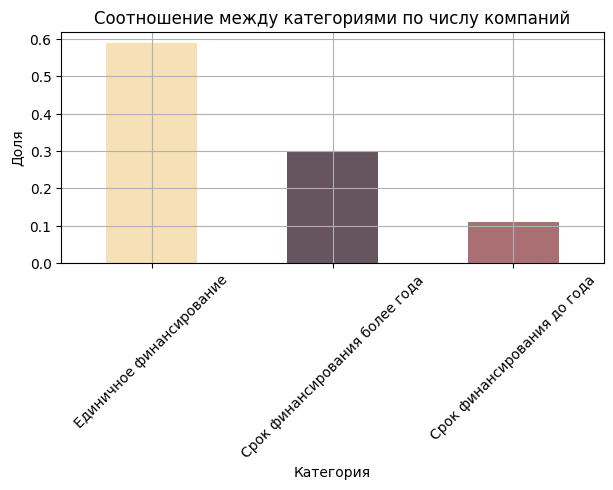

In [38]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Определяем список цветов для каждого столбца
colors = ['#f6e0b5', '#66545e', '#aa6f73']

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
cb_investments_df['funding_periods_categories'].value_counts(normalize=True).plot(
    kind='bar', # Тип графика - столбчатая диаграмма
    rot=45, # Градус вращения подписи по оси Х
    legend=False, # Выключаем легенду
    title=f'Соотношение между категориями по числу компаний',
    color=colors
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Доля')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Сравним эти категории по объёму инвестиций. Сначала рассчитаем (затем визуализируем), какую долю от общего объёма привлечённых средств получила каждая группа:

In [39]:
# Сгруппируем данные по значениям присвоенных категорий и рассчитаем объём инвестиций внутри каждой
cb_investments_df.groupby('funding_periods_categories')['funding_total_usd'].sum()

funding_periods_categories
Единичное финансирование          1.993044e+11
Срок финансирования более года    4.027433e+11
Срок финансирования до года       4.888598e+10
Name: funding_total_usd, dtype: float64

Теперь рассчитаем соотношение в долях от общего объёма привлечённых средств и визуализируем соотношение:

In [40]:
# Группируем данные по категориям и считаем объёмы привлечённых средств внутри каждой
total_per_category = cb_investments_df.groupby('funding_periods_categories')['funding_total_usd'].sum()

# Рассчитываем общий объём привлечённых средств по всем категориям
total_amount = total_per_category.sum()

# Рассчитываем доли каждой категории от общего объёма
shares = total_per_category / total_amount

print(shares)

funding_periods_categories
Единичное финансирование          0.306182
Срок финансирования более года    0.618716
Срок финансирования до года       0.075101
Name: funding_total_usd, dtype: float64


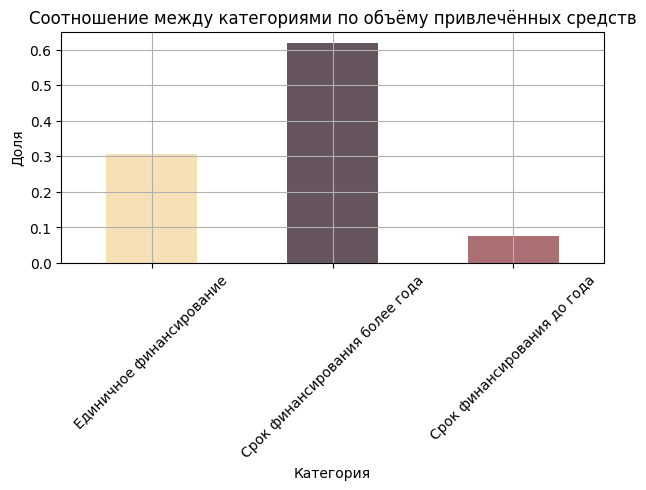

In [41]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Определяем список цветов для каждого столбца
colors = ['#f6e0b5', '#66545e', '#aa6f73']

# Строим столбчатую диаграмму с помощью pandas через plot(kind='bar')
shares.plot(
    kind='bar', # Тип графика - столбчатая диаграмма
    rot=45, # Градус вращения подписи по оси Х
    legend=False, # Выключаем легенду
    title=f'Соотношение между категориями по объёму привлечённых средств',
    color=colors
)

# Настраиваем оформление графика
plt.xlabel('Категория')
plt.ylabel('Доля')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

---

Итак, мы создали в первом датафрейме новый категориальный столбец, в котором распределили компании по срокам их финансирования на три категории: "Единичное финансирование", "Срок финансирования более года" и "Срок финансирования до года". 

По числу компаний, попавших в каждую категорию доли распределились следующим образом: 
- Единичное финансирование        0.589459
- Срок финансирования более года  0.300511
- Срок финансирования до года     0.110030 
Это распределение проиллюстрировано столбчатой диаграммой.

По объёму привлечённых инвестиций в каждую из категорий распределение получилось следующим:
- Единичное финансирование        0.306182
- Срок финансирования более года  0.618716
- Срок финансирования до года     0.075101
Это распределение также проиллюстрировано сравнительным графиком.

### Выделение средних и нишевых сегментов рынка

Компании указывают свой сегмент рынка в столбце `market`. Рассчитайте, как часто в датасете встречается каждый из сегментов. Сегменты, к которым относится более 120 компаний, отнесите к массовым, сегменты, в которые входит от 35 до 120 включительно, отнесите к средним, а сегменты до 35 компаний отнесите к нишевым. Рассчитайте, сколько сегментов попадает в каждую из категорий.

Постройте график распределения количества компаний в сегментах и отобразите на нём разделение на нишевые и средние сегменты.

Уточним количество уникальных значений в столбце market на данный момент работы с первым датасетом:

In [42]:
# Выводим число уникальных значений в столбце
cb_investments_df['market'].nunique()

394

То есть у нас в данных встречается 394 сегмента рынка. Рассчитаем, как часто в датасете встречается каждый из сегментов, но выведем только топ-20:

In [43]:
# Выводим топ-20 сегментов рынка по числу компаний 
cb_investments_df.groupby('market')['name'].count().sort_values(ascending=False).head(20)

market
software               4812
biotechnology          3590
mobile                 2344
e-commerce             1866
curated web            1693
enterprise software    1381
health care            1185
clean technology       1180
games                  1117
advertising            1107
hardware + software    1062
social media           1003
health and wellness     873
education               844
finance                 828
analytics               667
manufacturing           596
security                567
semiconductors          484
web hosting             424
Name: name, dtype: int64

Поделим сегменты на 3 категории и рассчитаем, сколько сегментов попадает в каждую из них:

In [44]:
# Рассчитываем количество компаний в каждом сегменте
segment_counts = cb_investments_df['market'].value_counts()

# Создаём пользовательскую функцию для категоризации сегментов
def categorize_segments(count):
    if count > 120:
        return 'Массовые'
    elif 35 <= count <= 120:
        return 'Средние'
    else:
        return 'Нишевые'

# Применяем функцию к каждому элементу серии
segment_categories = segment_counts.apply(categorize_segments)

# Выводим результаты категоризации сегментов
print(segment_categories.value_counts())

Нишевые     289
Средние      57
Массовые     48
Name: market, dtype: int64


In [45]:
# Выводим результаты категоризации сегментов в относительных значениях:
segment_categories.value_counts(normalize=True)

Нишевые     0.733503
Средние     0.144670
Массовые    0.121827
Name: market, dtype: float64

Построим график распределения количества компаний в сегментах (гистограмму):

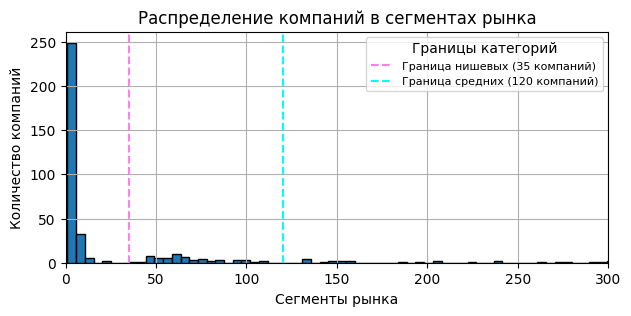

In [46]:
# Рассчитываем распределение компаний в сегментах
segment_count = cb_investments_df['market'].value_counts()

# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму
segment_count.plot(kind='hist',
                   bins=1000,
                   edgecolor='black',
                   rot=0,
                   label=''
)

# Устанавливаем пределы для оси X, чтобы сделать график более читаемым
plt.gca().set_xlim([0, 300])

# Добавляем вертикальные линии, показывающие категории сегментов
plt.axvline(x=35, color='#ff80ed', linestyle='--', label='Граница нишевых (35 компаний)')
plt.axvline(x=120, color='#00ffff', linestyle='--', label='Граница средних (120 компаний)')

# Отображаем легенду
plt.legend(title='Границы категорий', fontsize=8)

# Настраиваем оформление графика
plt.title('Распределение компаний в сегментах рынка')
plt.xlabel('Cегменты рынка')
plt.ylabel('Количество компаний')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

На графике мы видим иллюстрацию ранее полученных результатов категоризации сегментов в относительных значениях:
- Нишевые     0.733503
- Средние     0.144670
- Массовые    0.121827 

Подавляющее число компаний 73% относятся к нишевым, 14% - к средним и меньшая доля 12% к массовым.

Оставьте в столбце `market` только массовые сегменты. Для остальных сегментов замените значения на заглушки — `niche` для нишевых и `mid` для средних.

Дальнейшие исследования выполняйте с учётом этой замены. Индивидуальные сегменты внутри средней и нишевой групп рассматривать не нужно — они объединяются в два общих сегмента.


In [47]:
# Создаём новый столбец segment_category в первом датафрейме
# Заполняем его категориями на основании серии segment_categories
cb_investments_df['segment_category'] = cb_investments_df['market'].map(segment_categories)

# Выводим результат голову нового столбца и столбца market для самопроверки
cb_investments_df[['market', 'segment_category']].head(20)

,market,segment_category
0,education,Массовые
1,NaN,NaN
2,business services,Средние
3,education,Массовые
4,education,Массовые
5,NaN,NaN
6,education,Массовые
7,education,Массовые
8,NaN,NaN
9,social media,Массовые


In [48]:
# В цикле перебираем строки столбца market и изменяем значение у нишевых и средних
for string in range(len(cb_investments_df)):
    if pd.notna(cb_investments_df.loc[string, 'market']):
        if (cb_investments_df.loc[string, 'segment_category']) == 'Нишевые':
            cb_investments_df.loc[string, 'market'] = 'niche'
        elif (cb_investments_df.loc[string, 'segment_category']) == 'Средние':
            cb_investments_df.loc[string, 'market'] = 'mid'
        else:
            continue
    else: 
        continue

# Проверяем произведённые замены в столбце market
cb_investments_df[['market', 'segment_category']].head(40)

,market,segment_category
0,education,Массовые
1,NaN,NaN
2,mid,Средние
3,education,Массовые
4,education,Массовые
5,NaN,NaN
6,education,Массовые
7,education,Массовые
8,NaN,NaN
9,social media,Массовые


Замены значений в столбце market произведены корректно. 

---

В этой задаче мы работали с сегментами рынка, на которые распространяется деятельность исследуемых нами компаний. Таких сегментов в наших данных 394. Мы разделили все сегменты на три категории по числу компаний, которые встречаются в каждой сегменте. Соотношение между категриями получилось следующим:
- Нишевые     0.733503
- Средние     0.144670
- Массовые    0.121827

Также в этом подразделе мы построили график распределения (гистограмму), которая визуализировала соотношение между категориями сегментов.

Затем мы произвели замену значений в столбце с сегментами и оставили там только те сегменты, которые относятся к категории "Массовые".

## Шаг Работа с выбросами и анализ

### Анализируем и помечаем выбросы в каждом из сегментов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

По предобработанному столбцу `funding_total_usd` графическим образом оцените, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся. Укажите интервал, в котором лежат типичные значения.

In [49]:
# Устанавливаем формат отображения чисел (без сокращения нулей в больших числах)
pd.options.display.float_format = '{:.4f}'.format

# Выводим основные статистики столбца funding_total_usd
cb_investments_df['funding_total_usd'].describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

count         40907.0000
mean       15912526.0504
std       168678800.1670
min               1.0000
25%          350000.0000
50%         2000000.0000
75%        10000000.0000
95%        60000000.0000
99%       200000000.0000
max     30079503000.0000
Name: funding_total_usd, dtype: float64

Из основных статистик можно сделать следующие выводы о распределении средств, предоставляемых компаниям:
- Минимальное значение (min): 1 доллар США. Это наименьшая сумма финансирования, зафиксированная в наборе данных.
- 25-й процентиль (25%): 350 000 долларов США. Это означает, что 25% компаний получили финансирование в размере, не превышающем 350 000 долларов.
- Медианное значение (50%): 2 000 000 долларов США. Половина компаний получила финансирование в размере, равном или меньше 2 миллионов долларов.
- 75-й процентиль (75%): 10 000 000 долларов США. 75% компаний получили не более 10 миллионов долларов финансирования.
- 95-й и 99-й процентили (95%, 99%): компании на этих уровнях получили 60 000 000 и 200 000 000 долларов соответственно. Это указывает на то, что большая часть компаний получила значительно меньше этих сумм.
- Максимальное значение (max): 30 079 503 000 долларов США. Это наибольшая сумма финансирования в наборе данных, что может свидетельствовать о наличии нескольких крупных инвестиций, которые сильно влияют на среднее значение - поэтому оно получилось настолько больше медианы и в данном случае не является типичным значением для этого набора данных.

Для графической оценки "обычного" размера общего финансирования для одной компании построим диаграмму распределения и диаграмму размаха для столбца `funding_total_usd`:

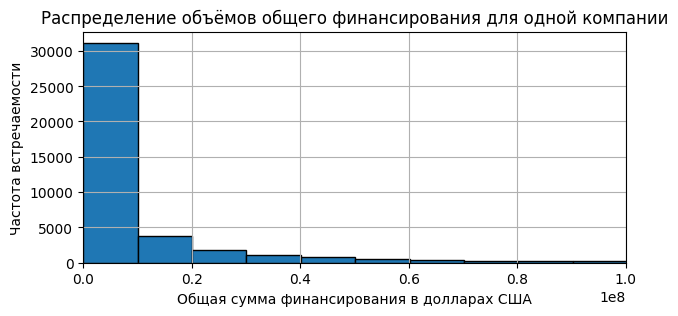

In [50]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим гистограмму
cb_investments_df['funding_total_usd'].plot(kind='hist',
                                            bins=3000,
                                            edgecolor='black',
                                            rot=0
)

# Устанавливаем пределы для оси X, чтобы сделать график более читаемым
plt.gca().set_xlim([0, 100000000])

# Настраиваем оформление графика
plt.title('Распределение объёмов общего финансирования для одной компании')
plt.xlabel('Общая сумма финансирования в долларах США')
plt.ylabel('Частота встречаемости')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Из-за большого разброса значений в нашем наборе данных и чтобы сделать график более читаемым, мы ограничили диапазон оси Х до 100 000 000 - чтобы подробнее рассмотреть распределение наиболее частых величин финансирования.

"Обычный" объём инвестиций для большинства компаний находится в интервале до 10 000 000 долларов.

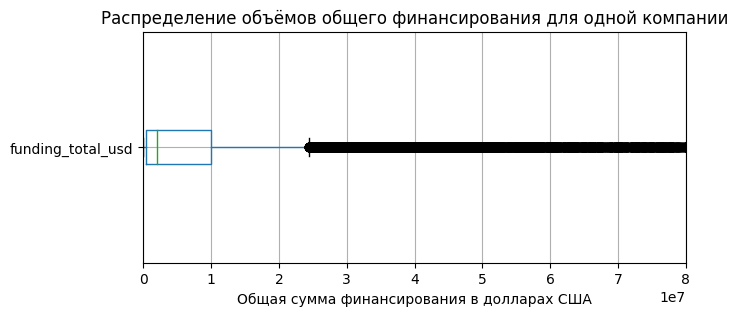

In [51]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(7, 3))

# Строим горизонтальную диаграмму размаха значений в столбце seats
cb_investments_df.boxplot(column='funding_total_usd', vert=False)

# Устанавливаем пределы для оси X, чтобы сделать график более читаемым
plt.gca().set_xlim([0, 80000000])

# Добавляем заголовок и метки оси
plt.title('Распределение объёмов общего финансирования для одной компании')
plt.xlabel('Общая сумма финансирования в долларах США')

# Выводим график
plt.show()

На диаграмме размаха мы так же для наглядности результатов ограничили диапазон оси Х (в этом случае до 80 000 000) из-за большого размаха данных. 

На диаграмме бы наблюдаем графическое подтверждение ранее полученных статистик. "Обычный" для рассматриваемого периода объём инвестиций для одной компании характеризует медиана в 2 миллиона долларов.

Определите компании с аномальным объёмом общего финансирования — используйте метод IQR отдельно по каждому сегменту. Напомним, что все нишевые сегменты должны быть объединены в одну группу, а средние — в другую.

Определите сегменты рынка с наибольшей долей компаний, получивших аномальное финансирование, и выведите топ таких сегментов.

In [52]:
# Смотрим, сколько сегментов у нас осталось после объединения нишевых и средних
cb_investments_df['market'].nunique()

50

In [53]:
# Создаем пустой датафрейм для хранения результатов
anomalous_segments = pd.DataFrame(columns=['segment', 'company_count', 'share'])

# Создаем пустой список для хранения всех аномально финансируемых компаний
all_anomalous_companies = []

# В цикле перебираем сегменты и расчитываем IQR и пороги для выбросов в каждом
for segment in cb_investments_df['market'].unique():
    Q1 = cb_investments_df[cb_investments_df['market'] == segment]['funding_total_usd'].quantile(0.25)
    Q3 = cb_investments_df[cb_investments_df['market'] == segment]['funding_total_usd'].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR
    df = cb_investments_df[cb_investments_df['market'] == segment]

    # Находим компании с аномальным объёмом финансирования
    anomalous_companies = df[(df['funding_total_usd'] > upper_bound) | (df['funding_total_usd'] < lower_bound)]

    # Добавляем аномальные компании в общий список
    all_anomalous_companies.extend(anomalous_companies['name'].tolist())

    # Подсчитываем количество аномальных компаний и их долю
    count_anomalous = anomalous_companies['name'].count()
    share_anomalous = count_anomalous / len(df)

    # Добавляем данные в результирующий датафрейм
    anomalous_segments = anomalous_segments.append({
        'segment': segment,
        'company_count': count_anomalous,
        'share': share_anomalous
    }, ignore_index=True)

# Выводим голову датафрейма с результатами
print(anomalous_segments.head())

# Преобразуем список компаний в серию
anomalous_companies_series = pd.Series(all_anomalous_companies)

# Серия из компаний, получивших аномальное финансирование
# print(anomalous_companies_series.head())

               segment company_count  share
0            education           112 0.1327
1                  NaN        0.0000    NaN
2                  mid           556 0.1448
3         social media           136 0.1356
4  hardware + software           123 0.1158


In [54]:
# Выводим топ-15 сегментов рынка с наибольшей долей компаний, получивших аномальное финансирование
anomalous_segments.sort_values(by='share', ascending=False).head(15)

,segment,company_count,share
30,real estate,48,0.1720
44,entertainment,25,0.1667
29,consulting,58,0.1662
40,search,48,0.1649
46,cloud computing,25,0.1645
38,photography,33,0.1618
45,saas,44,0.1618
31,technology,38,0.1597
42,video,30,0.1596
11,niche,132,0.1590


Проиллюстрируем результат линейчатой диаграммой для сравнения сегментов в топе между собой:

<Figure size 1000x2000 with 0 Axes>

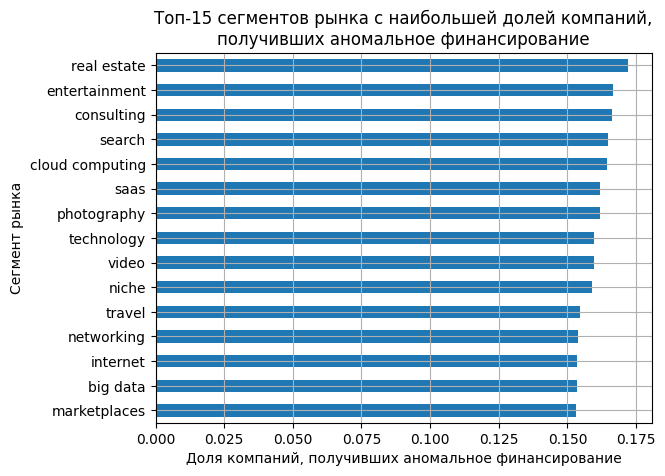

In [55]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 20))

# Отфильтровываем для построения графика только топ-15
filtered_top_15 = anomalous_segments[anomalous_segments['share'] >= 0.1530]

# Строим линейчатую диаграмму
filtered_top_15[['segment', 'share']].sort_values(by='share', ascending=True).plot(
    kind='barh',
    x='segment',
    legend=False,
    title=f'Топ-15 сегментов рынка с наибольшей долей компаний,\nполучивших аномальное финансирование')

# Настраиваем оформление графика
plt.xlabel('Доля компаний, получивших аномальное финансирование')
plt.ylabel('Сегмент рынка')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

---

<b>Отметим несколько моментов из результатов, полученных в этой задаче:<b>

"Обычный" объём инвестирования для большинства компаний находится в диапазоне от 350 000 до 10 000 000 долларов, с медианным значением в 2 миллиона долларов.

По анализу сегментов рынка с аномальным финансированием:

1. Доминирование технологических и цифровых сегментов:
   - В топ-15 вошли такие направления, как облачные вычисления, SaaS, big data, интернет и видео. Это свидетельствует о растущем интересе инвесторов к технологиям, способным трансформировать бизнес-процессы и создавать новые рынки.
   - Сегменты, связанные с цифровизацией (cloud computing, SaaS, big data), занимают ключевые позиции, что отражает глобальный тренд на внедрение IT-решений в различные отрасли.
2. Роль креативных и нишевых направлений:
   - Развлечения (entertainment), фотография и нишевые рынки также вошли в топ. Это указывает на потенциал сегментов, ориентированных на уникальные потребности и эмоциональные запросы потребителей.
   - Нишевые рынки занимают 11-е место, что подтверждает их значимость для инвесторов, ищущих нестандартные возможности.
3. Традиционные отрасли с инновационным потенциалом:
   - Недвижимость лидирует с долей 0.1720
   - Консалтинг входит в топ-3 сегментов
   - Путешествия показывают интерес инвесторов
4. Включение маркетплейсов в топ-15 отражает растущий интерес инвесторов к платформам, объединяющим продавцов и покупателей. Этот тренд связан с динамичным развитием электронной коммерции и трансформацией розничной торговли. 

### Определяем границы рассматриваемого периода, отбрасываем аномалии

Проверьте по датасету, можно ли считать, что вам предоставили полные данные за 2014 год. 

In [56]:
# Выведем обзор датасета, чтобы вспомнить, какие временные данные в нём присутствуют
cb_investments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40907 entries, 0 to 40906
Data columns (total 42 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   name                        40907 non-null  object        
 1   homepage_url                38593 non-null  object        
 2   category_list               38404 non-null  object        
 3   market                      38404 non-null  object        
 4   funding_total_usd           40907 non-null  float64       
 5   status                      39802 non-null  object        
 6   country_code                37088 non-null  object        
 7   state_code                  25619 non-null  object        
 8   region                      37088 non-null  object        
 9   city                        36402 non-null  object        
 10  funding_rounds              40907 non-null  float64       
 11  participants                27331 non-null  float64   

Временная информация в наших данных содержится в столбцах `founded_at`, `first_funding_at`, `mid_funding_at`, `last_funding_at`. Ещё в двух столбцах временные данные мы оставили в типе object: `founded_month` и `founded_quarter`. И в одном столбце год основания компаний в типе `float64` - founded_year. Посмотрим содержимое этих столбцов:

In [57]:
# Выводим голову столбцов с датами
cb_investments_df[['founded_at', 'first_funding_at', 'mid_funding_at', 'last_funding_at', 'founded_month', 'founded_quarter', 'founded_year']].head()

,founded_at,first_funding_at,mid_funding_at,last_funding_at,founded_month,founded_quarter,founded_year
0,NaT,2014-01-06,2014-01-06,2014-01-06,NaN,NaN,1636.0000
1,1785-01-01,2014-05-15,2014-05-15,2014-05-15,NaN,NaN,1785.0000
2,1802-07-19,2009-07-02,2009-07-02,2009-07-02,NaN,NaN,1802.0000
3,1817-01-01,2013-11-21,2013-11-21,2014-11-03,NaN,NaN,1817.0000
4,1826-01-01,2014-01-14,2014-01-14,2014-01-14,NaN,NaN,1826.0000


Почему-то даты в трёх столбцах с датами раундов финансирования одинаковые. Проверим, не произвошло ли ошибки вследствие предобработки:

In [58]:
# Выводим голову столбцов с датами в копии датасета до предобработки
temp1[['first_funding_at', 'mid_funding_at', 'last_funding_at']].head(20)

,first_funding_at,mid_funding_at,last_funding_at
0,2014-01-06,NaN,2014-01-06
1,2014-05-15,NaN,2014-05-15
2,2009-07-02,2009-07-02,2009-07-02
3,2013-11-21,2013-11-21,2014-11-03
4,2014-01-14,NaN,2014-01-14
5,2014-10-23,NaN,2014-10-23
6,2013-09-05,2013-09-05,2013-12-22
7,2014-01-12,NaN,2014-01-12
8,2014-09-30,NaN,2014-09-30
9,2007-10-01,2007-10-01,2008-03-01


Нет, в исходном датасете так и было. Во многих строках даты в этих трёх столбцах одинаковые.

Информация об инвестировании компаний, которая нас интересует в этом исследовании, содержится в столбцах `first_funding_at`, `mid_funding_at` и `last_funding_at`. Отфильтруем данные только за 2014 год и затем проверим, какие месяцы представлены в данных:

In [59]:
# Отфильтровываем данные только за 2014 год
df_filt_2014 = cb_investments_df[(cb_investments_df['first_funding_at'] >= '2014-01-01') & (cb_investments_df['first_funding_at'] <= '2014-12-31')]

# Выделяем в отдельный столбец месяц
df_filt_2014['first_funding_at_month'] = df_filt_2014['first_funding_at'].dt.month

# Смотрим, сколько наблюдений зафиксировано в каждом из месяцев 2014 года
df_filt_2014['first_funding_at_month'].value_counts()

1     810
7     671
6     669
3     661
2     635
4     593
5     549
9     538
8     525
10    492
11    311
12     23
Name: first_funding_at_month, dtype: int64

В декабре 2014 года данных численно значительно меньше, чем в остальные месяцы этого года. Стоит посмотреть дни декабря:

In [60]:
# Отфильтровываем данные только за декабрь 2014 года
df_filt_2014_december = cb_investments_df[(cb_investments_df['first_funding_at'] >= '2014-12-01') & (cb_investments_df['first_funding_at'] <= '2014-12-31')]

# Смотрим, какие дни декабря присутствуют в данных
df_filt_2014_december['first_funding_at'].sort_values()

190     2014-12-01
40903   2014-12-01
19424   2014-12-01
21619   2014-12-01
40902   2014-12-01
40901   2014-12-01
29302   2014-12-01
40900   2014-12-01
40899   2014-12-01
40898   2014-12-01
40897   2014-12-01
32199   2014-12-01
40904   2014-12-02
32197   2014-12-02
32146   2014-12-02
31520   2014-12-02
25617   2014-12-02
25616   2014-12-02
18195   2014-12-02
16340   2014-12-02
40905   2014-12-02
32132   2014-12-24
40906   2014-12-31
Name: first_funding_at, dtype: datetime64[ns]

Присутствуют данные только за 1, 2, 24 и 31 декабря. Выглядит так, будто часть данных отсутствует.

Аналогичные действия проведём с данными и датах остальных раундов: 

In [61]:
df_filt_2014['mid_funding_at_month'] = df_filt_2014['mid_funding_at'].dt.month
df_filt_2014['mid_funding_at_month'].value_counts()

6     749
7     700
1     662
3     621
4     604
5     587
8     576
9     566
2     531
10    510
11    332
12     39
Name: mid_funding_at_month, dtype: int64

In [62]:
df_filt_2014_december['mid_funding_at'].sort_values()

190     2014-12-01
40903   2014-12-01
19424   2014-12-01
21619   2014-12-01
40902   2014-12-01
40901   2014-12-01
29302   2014-12-01
40900   2014-12-01
40899   2014-12-01
40898   2014-12-01
40897   2014-12-01
32199   2014-12-01
40904   2014-12-02
32197   2014-12-02
32146   2014-12-02
31520   2014-12-02
25617   2014-12-02
25616   2014-12-02
18195   2014-12-02
16340   2014-12-02
40905   2014-12-02
32132   2014-12-24
40906   2014-12-31
Name: mid_funding_at, dtype: datetime64[ns]

Так же обстоят дела в столбце mid_funding_at: только 1, 2, 24 и 31 декабря 2014.

In [63]:
df_filt_2014['last_funding_at_month'] = df_filt_2014['last_funding_at'].dt.month
df_filt_2014['last_funding_at_month'].value_counts()

7     703
6     688
1     656
9     630
10    598
3     594
8     575
4     555
2     538
5     518
11    388
12     34
Name: last_funding_at_month, dtype: int64

In [64]:
df_filt_2014_december['last_funding_at'].sort_values()

190     2014-12-01
40903   2014-12-01
19424   2014-12-01
21619   2014-12-01
40902   2014-12-01
40901   2014-12-01
29302   2014-12-01
40900   2014-12-01
40899   2014-12-01
40898   2014-12-01
40897   2014-12-01
32199   2014-12-01
40904   2014-12-02
32197   2014-12-02
32146   2014-12-02
31520   2014-12-02
25617   2014-12-02
25616   2014-12-02
18195   2014-12-02
16340   2014-12-02
40905   2014-12-02
32132   2014-12-24
40906   2014-12-31
Name: last_funding_at, dtype: datetime64[ns]

Во всех трёх столбцах с раундами финансирования ситуация одинаковая - похоже, что данные за большую часть декабря 2014 года отсутствуют.

Затем исключите из датасета компании, которые вы ранее посчитали получившими аномальное финансирование.

In [65]:
# Считаем, сколько строк в списке таких компаний
len(anomalous_companies_series)

4871

In [66]:
# Сколько из них уникальных значений
anomalous_companies_series.nunique()

4869

In [67]:
print(f"Компаний до удаления аномальных: {cb_investments_df['name'].nunique()}")
print(f"Количество аномальных: {anomalous_companies_series.nunique()}")

# Удаляем из датасета компании, получившие аномальное финансирование
filtered_anom_df = cb_investments_df[~cb_investments_df['name'].isin(anomalous_companies_series)]

print(f"Компаний после удаления аномальных: {filtered_anom_df['name'].nunique()}")

Компаний до удаления аномальных: 40833
Количество аномальных: 4869
Компаний после удаления аномальных: 35964


Когда исключите аномальные записи, на основе столбцов `mid_funding_at` и `funding_rounds` оставьте в датасете данные только об определённых компаниях. Они должны были получать финансирование в годы, когда было зафиксировано 50 или более раундов финансирования.

In [68]:
# Выделяем из столбца с датами только год в новый столбец mid_funding_at_year
filtered_anom_df['mid_funding_at_year'] = filtered_anom_df['mid_funding_at'].dt.year

# Группируем по году и рассчитываем суммарное число раундов
filtered_anom_df.groupby('mid_funding_at_year')['funding_rounds'].sum().sort_values(ascending=False)

mid_funding_at_year
2013.0000   12943.0000
2012.0000    9750.0000
2011.0000    7611.0000
2014.0000    7242.0000
2010.0000    6197.0000
2009.0000    4669.0000
2008.0000    3680.0000
2007.0000    2849.0000
2006.0000    1879.0000
2005.0000     958.0000
2004.0000     188.0000
2003.0000     128.0000
2000.0000     122.0000
2002.0000     107.0000
2001.0000      84.0000
1999.0000      47.0000
1998.0000      15.0000
1995.0000       9.0000
1996.0000       8.0000
1997.0000       5.0000
1992.0000       5.0000
1994.0000       4.0000
1985.0000       3.0000
1982.0000       3.0000
1960.0000       2.0000
1987.0000       2.0000
1984.0000       2.0000
1993.0000       1.0000
1990.0000       1.0000
1989.0000       1.0000
1983.0000       1.0000
1979.0000       1.0000
1921.0000       1.0000
Name: funding_rounds, dtype: float64

Условию "50 и более раундов" соотвествуют годы с 2000 по 2014. Отсеем компании, которые получали финансирование до 2000 года:

In [69]:
# Отфильтровываем данные, оставляем только годы с 2000 по 2014
filtered_anom_21century_df = filtered_anom_df[filtered_anom_df['mid_funding_at_year'] >= 2000]

# Проверяем корректность предыдущего шага
filtered_anom_21century_df['mid_funding_at_year'].value_counts()

2013.0000    7871
2014.0000    6199
2012.0000    5562
2011.0000    4332
2010.0000    3511
2009.0000    2657
2008.0000    1995
2007.0000    1606
2006.0000    1179
2005.0000     705
2004.0000     100
2000.0000      68
2003.0000      64
2002.0000      53
2001.0000      43
Name: mid_funding_at_year, dtype: int64

В отфильтрованном датафрейме `filtered_anom_21century_df` остались только интересующие нас компании. Посчитаем их:

In [70]:
# Считаем количество уникальных компаний в отфильтрованном датафрейме
filtered_anom_21century_df['name'].nunique()

35887

In [71]:
# Количество строк 
filtered_anom_21century_df.shape[0]

35945

---

В задаче мы:

- Выяснили, что в 2014 году данные представлены не за полный год: присутствуют данные только за 1, 2, 24 и 31 декабря. Выглядит так, будто часть данных за декабрь отсутствует.
- Исключили из датасета компании, которые получили аномальное финансирование. Осталось 35945 строк, из них 35887 уникальных названий.

### Анализ типов финансирования по объёму и популярности

Постройте график, который покажет, какие типы финансирования в сумме привлекли больше всего денег. Ориентируйтесь на значения в столбцах `seed`, `venture`, `equity_crowdfunding`, `undisclosed`, `convertible_note`, `debt_financing`, `angel`, `grant`, `private_equity`, `post_ipo_equity`, `post_ipo_debt`, `secondary_market` и `product_crowdfunding`.

In [72]:
# Создаём переменную со списком столбцов по типам финансирования
columns_funding_types = ['seed', 'venture', 'equity_crowdfunding', 'undisclosed', 'convertible_note', 'debt_financing', 
               'angel', 'grant', 'private_equity', 'post_ipo_equity', 'post_ipo_debt', 'secondary_market',
               'product_crowdfunding']

# Создаем пустой датафрейм для хранения результатов
funding_types = pd.DataFrame(columns=['type', 'funding_sum', 'frequency'])

# Перебираем столбцы с типами финансирования
# Считаем суммарный объём финансирования по каждому типу и частоту встречаемости каждого типа
for column in columns_funding_types:
    funding_sum = filtered_anom_21century_df[column].sum()
    frequency = (filtered_anom_21century_df[column] > 0).sum()  # Считаем количество вхождений, где значение больше 0


    # Добавляем данные в результирующий датафрейм
    funding_types = funding_types.append({
        'type': column,
        'funding_sum': funding_sum,
        'frequency': frequency
    }, ignore_index=True)

# Выводим суммарные объёмы инвестиций по типам финансирования
funding_types[['type', 'funding_sum']].sort_values(by='funding_sum', ascending=False)

,type,funding_sum
1,venture,133907703555.0000
5,debt_financing,14305183337.0000
0,seed,9480578203.0000
8,private_equity,8972082748.0000
9,post_ipo_equity,5099300189.0000
10,post_ipo_debt,4286718349.0000
3,undisclosed,2924352937.0000
6,angel,2500813836.0000
7,grant,2168262622.0000
4,convertible_note,567144908.0000


In [73]:
# Рассчитываем общую сумму всех привлечённых средств
total_funding = funding_types['funding_sum'].sum()

# Добавляем новый столбец с долями
funding_types['sum_shares'] = funding_types['funding_sum'] / total_funding

# Выводим доли каждого типа финансирования относительно друг друга
funding_types[['type', 'sum_shares']].sort_values(by='sum_shares', ascending=False)

,type,sum_shares
1,venture,0.7246
5,debt_financing,0.0774
0,seed,0.0513
8,private_equity,0.0486
9,post_ipo_equity,0.0276
10,post_ipo_debt,0.0232
3,undisclosed,0.0158
6,angel,0.0135
7,grant,0.0117
4,convertible_note,0.0031


Построим график для сравнения этого соотношения суммарных объёмов финансирования по типам:

<Figure size 1000x1000 with 0 Axes>

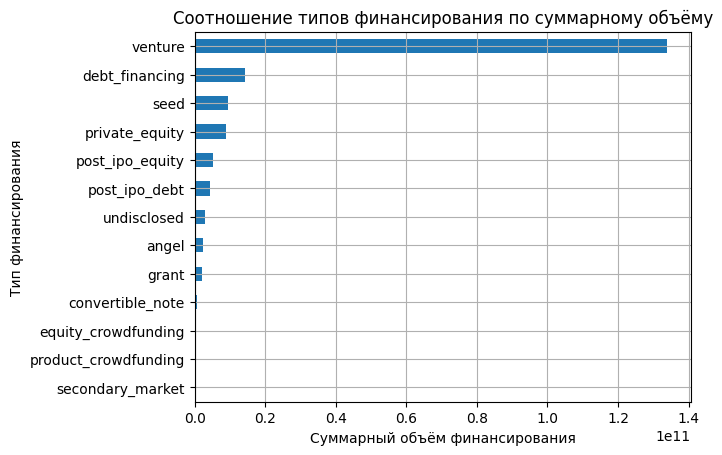

In [74]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 10))

# Строим линейчатую диаграмму
funding_types[['type', 'funding_sum']].sort_values(by='funding_sum', ascending=True).plot(
    kind='barh',
    x='type',
    legend=False,
    title=f'Соотношение типов финансирования по суммарному объёму')

# Настраиваем оформление графика
plt.xlabel('Суммарный объём финансирования')
plt.ylabel('Тип финансирования')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Также постройте график, который покажет популярность разных типов финансирования — какие типы финансирования чаще всего используются компаниями, то есть встречаются в датасете наибольшее количество раз.

In [75]:
# Выводим рейтинг по частоте упоминания типов финансирования
funding_types[['type', 'frequency']].sort_values(by='frequency', ascending=False)

,type,frequency
1,venture,19053
0,seed,13380
5,debt_financing,3312
6,angel,2937
7,grant,1020
3,undisclosed,834
8,private_equity,679
4,convertible_note,522
2,equity_crowdfunding,516
12,product_crowdfunding,205


<Figure size 1000x1000 with 0 Axes>

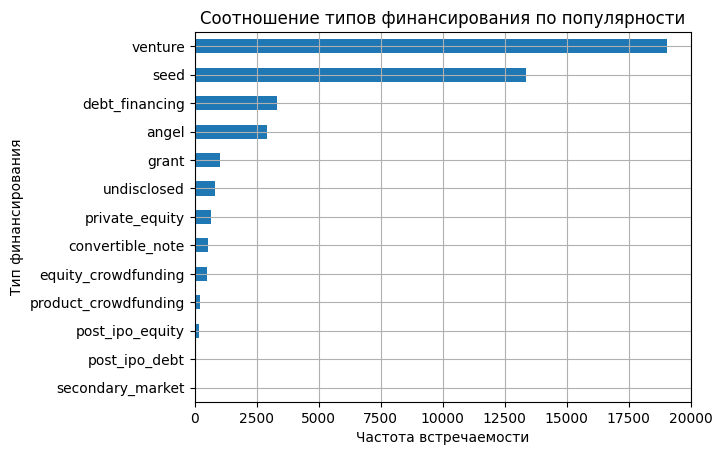

In [76]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 10))

# Строим линейчатую диаграмму
funding_types[['type', 'frequency']].sort_values(by='frequency', ascending=True).plot(
    kind='barh',
    x='type',
    legend=False,
    title=f'Соотношение типов финансирования по популярности')

# Настраиваем оформление графика
plt.xlabel('Частота встречаемости')
plt.ylabel('Тип финансирования')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

Сравните графики и выделите часто используемые типы финансирования, которые при этом характеризуются небольшими объёмами, и наоборот — те, что встречаются редко, но при этом характеризуются значительным объёмом предоставленных сумм.

Часто используемые типы финансирования, которые при этом характеризуются небольшими объёмами: 
- инвестиции от бизнес-ангелов (`angel`) и
- гранты (`grant`).

Типы финансирования, что встречаются редко, но при этом характеризуются значительным объёмом предоставленных сумм:
- финансирование после IPO (`post_ipo_equity`) и
- долговое финансирование после IPO (`post_ipo_debt`).

Постройте график суммарных объёмов возвратов от разных типов финансирования за весь период на основе дополнительного датасета.

In [77]:
# Создаем пустой датафрейм для хранения результатов
funding_types_returns = pd.DataFrame(columns=['type', 'returns_sum'])

# Перебираем столбцы с типами финансирования во втором датафрейме
# И рассчитываем суммарный объём возвратов по каждому типу
for col in columns_funding_types:
    returns_sum = cb_returns_df[col].sum()

    # Добавляем данные в результирующий датафрейм
    funding_types_returns = funding_types_returns.append({
        'type': col,
        'returns_sum': returns_sum
    }, ignore_index=True)

# Выводим рейтинг типов финансирования по суммарному объёему возвратов
funding_types_returns.sort_values(by='returns_sum', ascending=False)

,type,returns_sum
1,venture,40578.6200
5,debt_financing,4734.8500
8,private_equity,3587.3300
0,seed,2382.2400
6,angel,1509.2300
9,post_ipo_equity,1104.9600
3,undisclosed,730.8800
10,post_ipo_debt,91.0300
4,convertible_note,34.7900
11,secondary_market,5.2000


<Figure size 1000x1000 with 0 Axes>

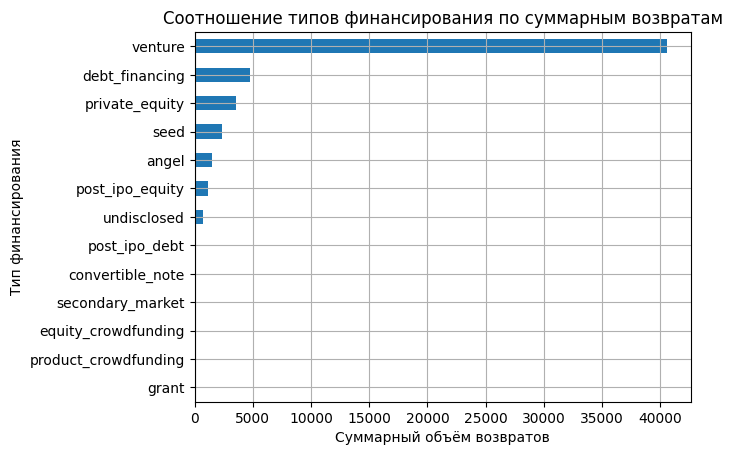

In [78]:
# Создаём контейнер графика matplotlib и задаём его размер
plt.figure(figsize=(10, 10))

# Строим линейчатую диаграмму
funding_types_returns.sort_values(by='returns_sum', ascending=True).plot(
    kind='barh',
    x='type',
    legend=False,
    title=f'Соотношение типов финансирования по суммарным возвратам')

# Настраиваем оформление графика
plt.xlabel('Суммарный объём возвратов')
plt.ylabel('Тип финансирования')
# Добавляем сетку графика
plt.grid()

# Выводим график
plt.show()

По расчётам и графику можно отметить: 

- Доминирование венчурного финансирования: абсолютный лидер по доходности с показателем 40578.62, превосходит все остальные типы финансирования в несколько раз, подтверждает эффективность вложений в стартапы и инновационные проекты.

- Значимость долгового и частного финансирования: долговое финансирование показывает второй результат (4734.85), `private equity` занимает третье место (3587.33), эти типы демонстрируют стабильную доходность.

- Потенциал ранних стадий: посевные инвестиции показывают хороший результат (2382.24), ангельские инвестиции также демонстрируют достойную доходность (1509.23)

- Низкие показатели некоторых типов: IPO-финансирование показывает относительно низкие результаты, краудфандинг и вторичный рынок имеют минимальные показатели, гранты не показали положительной доходности (0.00).

---

В задаче мы:

- Расситали, какие типы финансирования в сумме привлекли больше всего денег и постройте график для иллюстрации результатов.
- Рассчитали, какие типы финансирования чаще всего используются компаниями и построили иллюстрирующий соотношение график.
- Выделили часто используемые типы финансирования, которые при этом характеризуются небольшими объёмами, и — те, что встречаются редко, но при этом характеризуются значительным объёмом предоставленных сумм.
- Построили и проанализировали график суммарных объёмов возвратов от разных типов финансирования за весь период на основе второго датасета.

## Шаг 4. Анализ динамики

### Динамика предоставления финансирования по годам

Используя столбцы `funding_total_usd` и `funding_rounds`, рассчитайте для каждой компании средний объём одного раунда финансирования.

In [79]:
# Создаём новый столбец со средним объёмом одного раунда финансирования
filtered_anom_21century_df['avg_funding_at_round'] = filtered_anom_21century_df['funding_total_usd'] / filtered_anom_21century_df['funding_rounds']

# Проверяем корректность предыдущего действия
filtered_anom_21century_df[['funding_total_usd', 'funding_rounds', 'avg_funding_at_round']].head()

,funding_total_usd,funding_rounds,avg_funding_at_round
1,2000000.0000,1.0000,2000000.0000
2,9000000.0000,1.0000,9000000.0000
3,7700000.0000,3.0000,2566666.6667
4,540000.0000,1.0000,540000.0000
5,19000000.0000,1.0000,19000000.0000


На основе получившейся таблицы постройте графики, отражающие:
* динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования;

In [80]:
# filtered_anom_21century_df.info()

In [81]:
# Группируем по году и рассчитываем для каждого года типичное (среднее) значение
# среднего размера средств, которые стартапы получали в рамках одного раунда финансирования
grouped_years_df = filtered_anom_21century_df.groupby('mid_funding_at_year')['avg_funding_at_round'].mean()

# Выводим результат
grouped_years_df

# grouped_years_df.sort_values(ascending=False)

mid_funding_at_year
2000.0000   5016328.6159
2001.0000   3677062.7025
2002.0000   4703471.9455
2003.0000   3196893.5654
2004.0000   5220326.3728
2005.0000   5855184.5920
2006.0000   5398942.2011
2007.0000   5010018.8156
2008.0000   4395606.6514
2009.0000   3743000.4366
2010.0000   3715623.2454
2011.0000   2818668.1070
2012.0000   2573600.0241
2013.0000   2211693.7650
2014.0000   3741576.1268
Name: avg_funding_at_round, dtype: float64

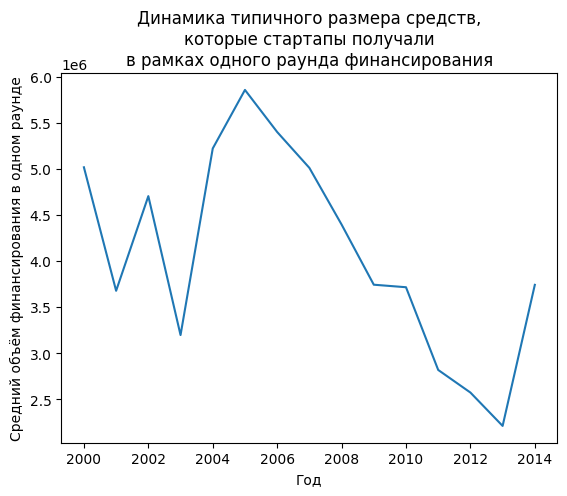

In [82]:
# Строим линейный график динамики типичного размера средств, 
# которые стартапы получали в рамках одного раунда финансирования
grouped_years_df.plot(kind='line', x='mid_funding_at_year', y='avg_funding_at_round', 
                      title='Динамика типичного размера средств,\nкоторые стартапы получали\nв рамках одного раунда финансирования')
plt.xlabel('Год')
plt.ylabel('Средний объём финансирования в одном раунде')
plt.show()

Период наблюдения охватывает 15 лет и демонстрирует неоднородную динамику объемов финансирования стартапов.

Ключевые тренды: 

Начальный период (2000-2005):
- Наблюдается относительно высокий уровень инвестиций
- Средний размер раунда колеблется от 3.7 до 5.9 млн долларов
- Пик пришелся на 2005 год (5.86 млн долларов)

Период спада (2006-2013):
- Постепенное снижение объемов финансирования
- Минимум достигнут в 2013 году (2.21 млн долларов)
- Влияние мирового финансового кризиса 2008-2009 годов заметно в снижении показателей 2009-2010 годов

Период восстановления (2014):
- Наблюдается рост до 3.74 млн долларов
- Восстановление до уровня 2009-2010 годов

Выводы по динамике:
- Цикличность рынка четко прослеживается в данных
- Волатильность инвестиций характерна для венчурного рынка
- Восстановление в 2014 году указывает на потенциал роста рынка

* динамику общего количества раундов за каждый год, то есть насколько активно происходили инвестиции на рынке (чем больше раундов, тем выше активность).

Когда будете строить графики в этом задании и следующих, используйте данные только по тем компаниям, которые остались в датасете после предыдущих фильтраций.

In [83]:
# Группируем по году и рассчитываем общее количество раундов за каждый год
grouped_years_df_2 = filtered_anom_21century_df.groupby('mid_funding_at_year')['funding_rounds'].sum()

# Выводим результат
grouped_years_df_2

# grouped_years_df_2.sort_values(ascending=False)

mid_funding_at_year
2000.0000     122.0000
2001.0000      84.0000
2002.0000     107.0000
2003.0000     128.0000
2004.0000     188.0000
2005.0000     958.0000
2006.0000    1879.0000
2007.0000    2849.0000
2008.0000    3680.0000
2009.0000    4669.0000
2010.0000    6197.0000
2011.0000    7611.0000
2012.0000    9750.0000
2013.0000   12943.0000
2014.0000    7242.0000
Name: funding_rounds, dtype: float64

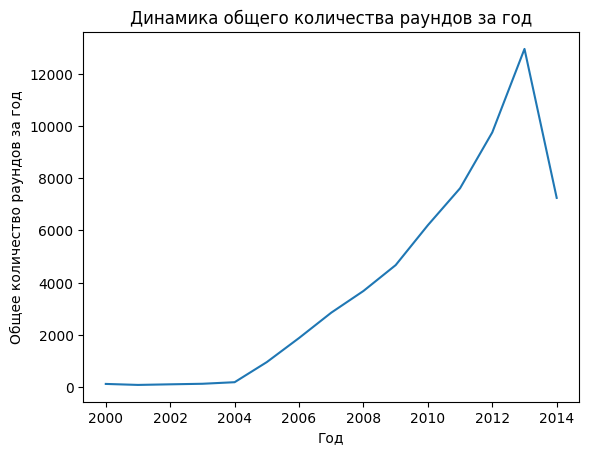

In [84]:
# Строим линейный график динамики общего количества раундов за каждый год
grouped_years_df_2.plot(kind='line', x='mid_funding_at_year', y='funding_rounds', 
                      title='Динамика общего количества раундов за год')
plt.xlabel('Год')
plt.ylabel('Общее количество раундов за год')
plt.show()

На основе полученных данных ответьте на вопросы:
* В каком году типичный размер средств, собранных в рамках одного раунда, был максимальным?

* Какая тенденция наблюдалась в 2014 году по количеству раундов и средств, выделяемых в рамках каждого раунда?

Типичный размер средств, собранных в рамках одного раунда, был максимальным в 2005 году.

В 2014-ом наблюдался спад по общему числу раундов по сравнению с предыдущими 2013 и 2012 - число раундов в 2014 было в районе показателя за 2011 год. И это при том, что с 2000 по 2013 тенденция была только на рост этого показателя от года к году. В предыдущем 2013 показатель достиг максимума за наблюдаемый нами интервал времени.

По количеству средств, выделяемых в рамках каждого раунда, в 2014 году наблюдался, наоборот, рост по сравнению с предыдущим 2013, в котором этот показатель достиг минимума за наблюдаемый нами интервал времени. В 2014 показатель вернулся к уровню 2009-2010 годов.

### Динамика размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов

Составьте сводную таблицу, в которой указывается суммарный размер общего финансирования `funding_total_usd` по годам и сегментам рынка. 

In [85]:
# Создаём сводную таблицу с рассчётом суммарного размера общего финансированияпо годам и сегментам рынка
segments_pivot = filtered_anom_21century_df.pivot_table(index=['market'], 
                                                        values='funding_total_usd', 
                                                        columns='mid_funding_at_year', 
                                                        aggfunc='sum')
# Выводим таблицу
segments_pivot

mid_funding_at_year,2000.0000,2001.0000,2002.0000,2003.0000,2004.0000,2005.0000,2006.0000,2007.0000,2008.0000,2009.0000,2010.0000,2011.0000,2012.0000,2013.0000,2014.0000
market,,,,,,,,,,,,,,,
advertising,14470000.0000,8778321.0000,24500000.0000,10500000.0000,6000000.0000,127196022.0000,299299458.0000,556704331.0000,622673464.0000,563446005.0000,631617869.0000,410730737.0000,521137032.0000,524915135.0000,207792333.0000
analytics,14822803.0000,NaN,7500000.0000,3840000.0000,3000000.0000,79014044.0000,139701311.0000,98829000.0000,208077840.0000,140949327.0000,253739903.0000,443333373.0000,539214309.0000,622721367.0000,151461613.0000
apps,NaN,NaN,NaN,NaN,NaN,NaN,1310600.0000,NaN,3050000.0000,7219000.0000,6123779.0000,18374071.0000,32601125.0000,28868621.0000,66237730.0000
automotive,NaN,NaN,NaN,4530000.0000,NaN,22500000.0000,12660000.0000,37712601.0000,59478635.0000,20800311.0000,17696916.0000,76452163.0000,35557677.0000,117572526.0000,69034162.0000
big data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7780000.0000,2452515.0000,597375.0000,39233297.0000,60369158.0000,86413341.0000,78698922.0000,79232600.0000
biotechnology,NaN,NaN,NaN,85531178.0000,97184859.0000,480063583.0000,903500543.0000,1704078338.0000,1716033000.0000,3915900521.0000,4894500078.0000,4967551850.0000,4931138800.0000,5694269809.0000,2509638562.0000
clean technology,NaN,NaN,34390435.0000,50352939.0000,50427954.0000,19420000.0000,131473889.0000,749711239.0000,3165808492.0000,1963502838.0000,1604429454.0000,1545603337.0000,958011189.0000,1203060535.0000,688686785.0000
cloud computing,11500000.0000,NaN,NaN,NaN,NaN,NaN,9951809.0000,20354343.0000,44375000.0000,52223719.0000,8525538.0000,73151398.0000,74421582.0000,84846778.0000,73440856.0000
consulting,4500000.0000,NaN,NaN,NaN,NaN,44862000.0000,23965548.0000,70346345.0000,19061080.0000,62715165.0000,81264877.0000,43413397.0000,65922756.0000,93321324.0000,54298022.0000


Отберите из неё только те сегменты, которые показывали рост размера суммарного финансирования в 2014 году по сравнению с 2013.

In [86]:
# Отфильтровываем сводную таблицу по условию задачи
filtered_segments_pivot = segments_pivot[segments_pivot[2014] > segments_pivot[2013]]

# Выводим результат
filtered_segments_pivot

mid_funding_at_year,2000.0000,2001.0000,2002.0000,2003.0000,2004.0000,2005.0000,2006.0000,2007.0000,2008.0000,2009.0000,2010.0000,2011.0000,2012.0000,2013.0000,2014.0000
market,,,,,,,,,,,,,,,
apps,NaN,NaN,NaN,NaN,NaN,NaN,1310600.0000,NaN,3050000.0000,7219000.0000,6123779.0000,18374071.0000,32601125.0000,28868621.0000,66237730.0000
big data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7780000.0000,2452515.0000,597375.0000,39233297.0000,60369158.0000,86413341.0000,78698922.0000,79232600.0000
design,NaN,NaN,NaN,NaN,NaN,9300000.0000,707000.0000,10800000.0000,5944302.0000,2150144.0000,17239975.0000,8899967.0000,39630692.0000,60958835.0000,68988516.0000
internet,10000000.0000,NaN,1100000.0000,NaN,10500000.0000,1775000.0000,5000.0000,4495379.0000,23412964.0000,38195773.0000,36657500.0000,36859032.0000,28288685.0000,69732096.0000,117830756.0000
manufacturing,56659310.0000,2368582.0000,NaN,4269608.0000,3000000.0000,61770000.0000,163957751.0000,147726051.0000,173054260.0000,422862531.0000,244329661.0000,561639285.0000,522205168.0000,393936634.0000,416332314.0000
medical,24000000.0000,NaN,NaN,NaN,NaN,11090000.0000,20250000.0000,2100000.0000,28812744.0000,11566200.0000,25590338.0000,28540962.0000,44039600.0000,64469424.0000,175236064.0000
mid,82440389.0000,9441026.0000,18885799.0000,43238404.0000,54438160.0000,214407455.0000,347522579.0000,503542893.0000,531598823.0000,634065533.0000,897182321.0000,876133430.0000,1396138268.0000,1686905096.0000,1868755421.0000
niche,14600000.0000,24020000.0000,NaN,NaN,NaN,NaN,11180000.0000,44494637.0000,22279331.0000,20754888.0000,18659455.0000,97552701.0000,51648120.0000,269904287.0000,738172920.0000
real estate,2500000.0000,NaN,5275000.0000,6292200.0000,NaN,250000.0000,2080000.0000,33220000.0000,46613100.0000,38840213.0000,37344608.0000,20015128.0000,77320857.0000,92207655.0000,115567364.0000


На графике отразите, как менялся суммарный размер общего финансирования в каждом из отобранных сегментов по годам, за которые у вас достаточно данных. Рассматривайте только массовые сегменты, а средние и нишевые исключите.

In [87]:
# Создаём копию таблицы
filt_segments = filtered_segments_pivot.copy()

# Сбрасываем индекс
filt_segments = filt_segments.reset_index()

# Исключаем средние и нишевые сегменты
filt_segments = filt_segments[(filt_segments['market'] != 'mid') & (filt_segments['market'] != 'niche')]

# Проверяем корректность предыдущего действия
filt_segments['market']

0              apps
1          big data
2            design
3          internet
4     manufacturing
5           medical
8       real estate
9              saas
10         startups
11       technology
Name: market, dtype: object

In [88]:
# Устанавливаем столбец с сегментами в качестве индекса
filt_segments = filt_segments.set_index('market')
filt_segments

mid_funding_at_year,2000.0000,2001.0000,2002.0000,2003.0000,2004.0000,2005.0000,2006.0000,2007.0000,2008.0000,2009.0000,2010.0000,2011.0000,2012.0000,2013.0000,2014.0000
market,,,,,,,,,,,,,,,
apps,NaN,NaN,NaN,NaN,NaN,NaN,1310600.0000,NaN,3050000.0000,7219000.0000,6123779.0000,18374071.0000,32601125.0000,28868621.0000,66237730.0000
big data,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7780000.0000,2452515.0000,597375.0000,39233297.0000,60369158.0000,86413341.0000,78698922.0000,79232600.0000
design,NaN,NaN,NaN,NaN,NaN,9300000.0000,707000.0000,10800000.0000,5944302.0000,2150144.0000,17239975.0000,8899967.0000,39630692.0000,60958835.0000,68988516.0000
internet,10000000.0000,NaN,1100000.0000,NaN,10500000.0000,1775000.0000,5000.0000,4495379.0000,23412964.0000,38195773.0000,36657500.0000,36859032.0000,28288685.0000,69732096.0000,117830756.0000
manufacturing,56659310.0000,2368582.0000,NaN,4269608.0000,3000000.0000,61770000.0000,163957751.0000,147726051.0000,173054260.0000,422862531.0000,244329661.0000,561639285.0000,522205168.0000,393936634.0000,416332314.0000
medical,24000000.0000,NaN,NaN,NaN,NaN,11090000.0000,20250000.0000,2100000.0000,28812744.0000,11566200.0000,25590338.0000,28540962.0000,44039600.0000,64469424.0000,175236064.0000
real estate,2500000.0000,NaN,5275000.0000,6292200.0000,NaN,250000.0000,2080000.0000,33220000.0000,46613100.0000,38840213.0000,37344608.0000,20015128.0000,77320857.0000,92207655.0000,115567364.0000
saas,NaN,NaN,2000000.0000,NaN,NaN,5240000.0000,4791121.0000,14652595.0000,27226900.0000,13536585.0000,32609390.0000,32223749.0000,49699912.0000,79576613.0000,92807752.0000
startups,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5010387.0000,460700.0000,2111966.0000,19654403.0000,12358782.0000,18080552.0000,41501837.0000


In [89]:
# Переворачиваем таблицу для корректного построения последующего графика
transposed_df = filt_segments.transpose()
transposed_df

market,apps,big data,design,internet,manufacturing,medical,real estate,saas,startups,technology
mid_funding_at_year,,,,,,,,,,
2000.0000,NaN,NaN,NaN,10000000.0000,56659310.0000,24000000.0000,2500000.0000,NaN,NaN,NaN
2001.0000,NaN,NaN,NaN,NaN,2368582.0000,NaN,NaN,NaN,NaN,22160000.0000
2002.0000,NaN,NaN,NaN,1100000.0000,NaN,NaN,5275000.0000,2000000.0000,NaN,11000000.0000
2003.0000,NaN,NaN,NaN,NaN,4269608.0000,NaN,6292200.0000,NaN,NaN,NaN
2004.0000,NaN,NaN,NaN,10500000.0000,3000000.0000,NaN,NaN,NaN,NaN,1750000.0000
2005.0000,NaN,NaN,9300000.0000,1775000.0000,61770000.0000,11090000.0000,250000.0000,5240000.0000,NaN,50728425.0000
2006.0000,1310600.0000,NaN,707000.0000,5000.0000,163957751.0000,20250000.0000,2080000.0000,4791121.0000,NaN,22791000.0000
2007.0000,NaN,7780000.0000,10800000.0000,4495379.0000,147726051.0000,2100000.0000,33220000.0000,14652595.0000,NaN,180190209.0000
2008.0000,3050000.0000,2452515.0000,5944302.0000,23412964.0000,173054260.0000,28812744.0000,46613100.0000,27226900.0000,5010387.0000,277726238.0000


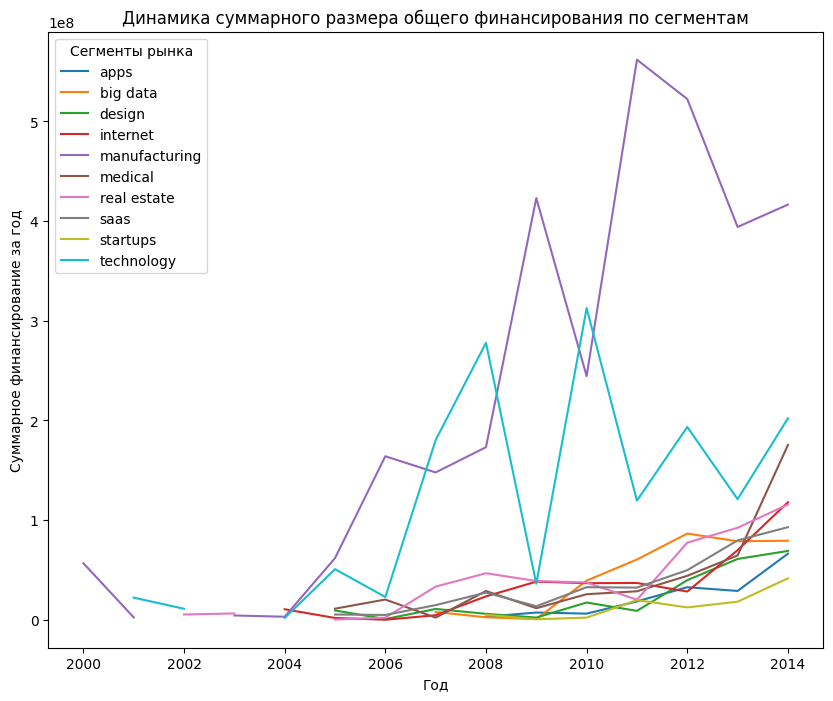

In [90]:
# Строим линейный график динамики суммарного размера общего финансирования по сегментам
transposed_df.plot(kind='line',  figsize=(10, 8))
plt.title('Динамика суммарного размера общего финансирования по сегментам')
plt.xlabel('Год')
plt.ylabel('Суммарное финансирование за год')
plt.legend(title='Сегменты рынка')
plt.show()

На основе графика сделайте вывод о том, какие сегменты показывают наиболее быстрый и уверенный рост.

Самым заметным на графике сегментом, показывающим наиболее выраженный за изучаемый период рост, можно назвать производство (`manufacturing`), но нужно отметить, что от года к году рост в этом сегменте нестабилен: чередуются рост показателя и его падение. Но общий тренд - всё-таки на значительный рост. 

Ещё одна заметная на графике кривая относится к сегменту `technology` - в нём наблюдают очень сильные скачки от года к году и, если говорить именно за все 15 рассматриваемых лет, то рост не такой небольшой, как у производства.

Остальные сектора показывают не резкий, но в общем тренд на рост. Из них можно выделить медицинский сектор (`medical`) - он особенно сильно скакнул вверх с 2013 к 2014 и по динамике за 15 лет приближается к технологиям.

### Годовая динамика доли возвращённых средств по типам финансирования

Заказчик хочет знать, какая часть вложенных или выданных денег со временем возвращается обратно инвесторам или финансистам. Ваша цель — для каждого года и каждого вида финансирования рассчитать нормированные значения возврата средств: то есть какую долю возвращённые средства составляют от предоставленных. При этом слишком большие аномальные значения, то есть неадекватные выбросы, нужно заменить на пропуски.

Совет: когда будете делить сумму возвращённых средств на суммарный объём привлечённого финансирования по конкретному году, добавьте к знаменателю небольшое число, например `1e-60`. Это поможет избежать деления на ноль.

In [91]:
# Выводим второй датасет
cb_returns_df

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.7000,55.4000,0.0000,78.2100,0.0000,8.6600,6.4300,0.0000,0.0000,0.9400,0.0000,0.2000,0.0000
2001,2.8800,23.4900,0.0000,21.5000,0.0100,4.4900,1.1800,0.0000,0.0000,0.4600,0.0000,0.4600,0.0000
2002,6.5900,209.4200,0.0000,25.7700,0.0200,3.4200,3.4100,0.0000,1.5100,0.3400,0.0000,0.0600,0.0000
2003,7.7400,233.8600,0.0000,9.4000,0.0100,1.0900,3.4100,0.0000,1.6200,2.1100,0.0000,0.0800,0.0000
2004,9.9300,555.9000,0.0000,33.1900,0.0100,13.5500,9.1800,0.0000,2.1900,3.3800,0.0000,0.5500,0.0000
2005,26.6000,2628.9200,0.0000,9.5100,0.0200,35.0900,31.0600,0.0000,2.4000,3.5100,0.0000,0.0500,0.0000
2006,61.8100,3100.1800,0.1900,46.7400,1.7800,113.2100,47.7500,0.0000,16.6700,20.5800,0.0000,0.1200,0.0000
2007,70.4100,3585.3700,0.0100,55.3700,3.2200,125.6800,164.5100,0.0000,88.8100,24.3600,0.0000,0.5700,0.0000
2008,89.7200,2717.0200,0.0300,41.0200,1.7100,397.5400,102.8300,0.0000,130.3800,84.2800,0.0000,0.4700,0.0000


In [92]:
# Выводим те же столбцы первого датасета
filtered_anom_21century_df[['mid_funding_at_year', 'seed', 'venture', 'equity_crowdfunding', 'undisclosed', 
                            'convertible_note', 'debt_financing', 'angel', 'grant', 'private_equity', 
                            'post_ipo_equity', 'post_ipo_debt', 'secondary_market', 'product_crowdfunding']].head()

,mid_funding_at_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
1,2014.0000,0.0000,2000000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,2009.0000,0.0000,9000000.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,2013.0000,0.0000,0.0000,0.0000,1600000.0000,0.0000,0.0000,0.0000,6100000.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4,2014.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,540000.0000,0.0000,0.0000,0.0000,0.0000,0.0000
5,2014.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,19000000.0000,0.0000,0.0000,0.0000,0.0000,0.0000


Приведём первый датасет к виду, аналогичному второму для последующего корректного расчёта.

In [93]:
# Создаём копию первого датафрейма
df_types_years = filtered_anom_21century_df.copy()

In [94]:
# Группируем первый датасет по годам и рассчитываем суммарные объёмы инвестирования по каждому типу финансирования 
df_types_years_grouped = df_types_years.groupby('mid_funding_at_year').sum()
df_types_years_grouped

,funding_total_usd,funding_rounds,participants,founded_year,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,...,product_crowdfunding,round_a,round_b,round_c,round_d,round_e,round_f,round_g,round_h,avg_funding_at_round
mid_funding_at_year,,,,,,,,,,,,,,,,,,,,,
2000.0000,657189993.0000,122.0000,43.0000,105907.0000,16759140.0000,375362152.0000,0.0000,215502640.0000,0.0000,14000000.0000,...,0.0000,120695732.0000,110088531.0000,62711500.0000,6700000.0000,2500000.0000,0.0000,0.0000,0.0000,341110345.8810
2001.0000,366572931.0000,84.0000,22.0000,63921.0000,26398965.0000,285220682.0000,0.0000,46524067.0000,1500000.0000,5829217.0000,...,0.0000,53702057.0000,86564474.0000,49463178.0000,29400000.0000,17773110.0000,0.0000,0.0000,0.0000,158113696.2083
2002.0000,460203370.0000,107.0000,45.0000,89919.0000,10465192.0000,342362899.0000,0.0000,42323731.0000,0.0000,15309671.0000,...,0.0000,117435032.0000,101154302.0000,58812132.0000,22650003.0000,9209548.0000,0.0000,0.0000,0.0000,249284013.1111
2003.0000,449363158.0000,128.0000,34.0000,108084.0000,15318355.0000,400234425.0000,0.0000,10280000.0000,0.0000,1050000.0000,...,0.0000,90723840.0000,114291483.0000,74228777.0000,14090000.0000,0.0000,0.0000,0.0000,0.0000,204601188.1833
2004.0000,895536964.0000,188.0000,115.0000,148136.0000,17904728.0000,723016178.0000,0.0000,98758160.0000,0.0000,30816623.0000,...,0.0000,259393165.0000,163730591.0000,63705454.0000,36500000.0000,7050000.0000,6500000.0000,0.0000,0.0000,522032637.2807
2005.0000,5129942439.0000,958.0000,1615.0000,1033727.0000,39425198.0000,4902948129.0000,0.0000,8871332.0000,0.0000,101720656.0000,...,0.0000,979604068.0000,1186916802.0000,866107758.0000,417154352.0000,207826018.0000,42379491.0000,0.0000,0.0000,4127905137.3460
2006.0000,9603744398.0000,1879.0000,2382.0000,1625677.0000,64894774.0000,9200693515.0000,933057.0000,71842903.0000,11807857.0000,140848395.0000,...,0.0000,1663406994.0000,2291840252.0000,1479209261.0000,720774737.0000,237557664.0000,38880000.0000,3638297.0000,0.0000,6365352855.0656
2007.0000,13568794298.0000,2849.0000,2679.0000,2526107.0000,192296481.0000,12151591399.0000,0.0000,109649902.0000,14116788.0000,657901638.0000,...,0.0000,2657134813.0000,3238115161.0000,1676364604.0000,788882988.0000,313538810.0000,44941003.0000,26000000.0000,0.0000,8046090217.7913
2008.0000,15860544762.0000,3680.0000,3008.0000,3044800.0000,297853020.0000,14460141965.0000,0.0000,143785523.0000,28600902.0000,428622061.0000,...,1000000.0000,3273974577.0000,3404485690.0000,1865422132.0000,578665365.0000,391600000.0000,34500000.0000,0.0000,0.0000,8769235269.5167


In [95]:
# Оставляем в первом датасете только столбцы с годами и типами финансирования
df_types_years_grouped = df_types_years_grouped[columns_funding_types]
df_types_years_grouped

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
mid_funding_at_year,,,,,,,,,,,,,
2000.0000,16759140.0000,375362152.0000,0.0000,215502640.0000,0.0000,14000000.0000,24086333.0000,293114.0000,0.0000,3467747.0000,0.0000,7718867.0000,0.0000
2001.0000,26398965.0000,285220682.0000,0.0000,46524067.0000,1500000.0000,5829217.0000,1000000.0000,100000.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2002.0000,10465192.0000,342362899.0000,0.0000,42323731.0000,0.0000,15309671.0000,3000000.0000,0.0000,46441877.0000,300000.0000,0.0000,0.0000,0.0000
2003.0000,15318355.0000,400234425.0000,0.0000,10280000.0000,0.0000,1050000.0000,5629661.0000,16850717.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2004.0000,17904728.0000,723016178.0000,0.0000,98758160.0000,0.0000,30816623.0000,11013741.0000,14027534.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2005.0000,39425198.0000,4902948129.0000,0.0000,8871332.0000,0.0000,101720656.0000,60914621.0000,6266481.0000,5000000.0000,4796022.0000,0.0000,0.0000,0.0000
2006.0000,64894774.0000,9200693515.0000,933057.0000,71842903.0000,11807857.0000,140848395.0000,70756153.0000,6147500.0000,35820244.0000,0.0000,0.0000,0.0000,0.0000
2007.0000,192296481.0000,12151591399.0000,0.0000,109649902.0000,14116788.0000,657901638.0000,201152441.0000,34237779.0000,195847870.0000,12000000.0000,0.0000,0.0000,0.0000
2008.0000,297853020.0000,14460141965.0000,0.0000,143785523.0000,28600902.0000,428622061.0000,249299613.0000,23485347.0000,191756331.0000,36000000.0000,0.0000,0.0000,1000000.0000


In [96]:
# Сбрасываем индекс в первом датасете
df_types_years_grouped = df_types_years_grouped.reset_index()

# Приводим тип данных в столбце с годом к целочисленному
df_types_years_grouped['mid_funding_at_year'] = df_types_years_grouped['mid_funding_at_year'].astype('int16')

# Переименовываем столбец с годом
df_types_years_grouped = df_types_years_grouped.rename(columns={'mid_funding_at_year': 'year'})

# Устанавливаем столбец с годом в качестве индекса 
df_types_years_grouped = df_types_years_grouped.set_index('year')

# Выводим результат
df_types_years_grouped

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16759140.0000,375362152.0000,0.0000,215502640.0000,0.0000,14000000.0000,24086333.0000,293114.0000,0.0000,3467747.0000,0.0000,7718867.0000,0.0000
2001,26398965.0000,285220682.0000,0.0000,46524067.0000,1500000.0000,5829217.0000,1000000.0000,100000.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2002,10465192.0000,342362899.0000,0.0000,42323731.0000,0.0000,15309671.0000,3000000.0000,0.0000,46441877.0000,300000.0000,0.0000,0.0000,0.0000
2003,15318355.0000,400234425.0000,0.0000,10280000.0000,0.0000,1050000.0000,5629661.0000,16850717.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2004,17904728.0000,723016178.0000,0.0000,98758160.0000,0.0000,30816623.0000,11013741.0000,14027534.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2005,39425198.0000,4902948129.0000,0.0000,8871332.0000,0.0000,101720656.0000,60914621.0000,6266481.0000,5000000.0000,4796022.0000,0.0000,0.0000,0.0000
2006,64894774.0000,9200693515.0000,933057.0000,71842903.0000,11807857.0000,140848395.0000,70756153.0000,6147500.0000,35820244.0000,0.0000,0.0000,0.0000,0.0000
2007,192296481.0000,12151591399.0000,0.0000,109649902.0000,14116788.0000,657901638.0000,201152441.0000,34237779.0000,195847870.0000,12000000.0000,0.0000,0.0000,0.0000
2008,297853020.0000,14460141965.0000,0.0000,143785523.0000,28600902.0000,428622061.0000,249299613.0000,23485347.0000,191756331.0000,36000000.0000,0.0000,0.0000,1000000.0000


In [97]:
# Сравниваем две таблицы
cb_returns_df

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,16.7000,55.4000,0.0000,78.2100,0.0000,8.6600,6.4300,0.0000,0.0000,0.9400,0.0000,0.2000,0.0000
2001,2.8800,23.4900,0.0000,21.5000,0.0100,4.4900,1.1800,0.0000,0.0000,0.4600,0.0000,0.4600,0.0000
2002,6.5900,209.4200,0.0000,25.7700,0.0200,3.4200,3.4100,0.0000,1.5100,0.3400,0.0000,0.0600,0.0000
2003,7.7400,233.8600,0.0000,9.4000,0.0100,1.0900,3.4100,0.0000,1.6200,2.1100,0.0000,0.0800,0.0000
2004,9.9300,555.9000,0.0000,33.1900,0.0100,13.5500,9.1800,0.0000,2.1900,3.3800,0.0000,0.5500,0.0000
2005,26.6000,2628.9200,0.0000,9.5100,0.0200,35.0900,31.0600,0.0000,2.4000,3.5100,0.0000,0.0500,0.0000
2006,61.8100,3100.1800,0.1900,46.7400,1.7800,113.2100,47.7500,0.0000,16.6700,20.5800,0.0000,0.1200,0.0000
2007,70.4100,3585.3700,0.0100,55.3700,3.2200,125.6800,164.5100,0.0000,88.8100,24.3600,0.0000,0.5700,0.0000
2008,89.7200,2717.0200,0.0300,41.0200,1.7100,397.5400,102.8300,0.0000,130.3800,84.2800,0.0000,0.4700,0.0000


для каждого года и каждого вида финансирования рассчитать нормированные значения возврата средств: то есть какую долю возвращённые средства составляют от предоставленных.

Совет: когда будете делить сумму возвращённых средств на суммарный объём привлечённого финансирования по конкретному году, добавьте к знаменателю небольшое число, например 1e-60. Это поможет избежать деления на ноль.

In [98]:
# Рассчитываем, какую долю возвращённые средства составляют от предоставленных 
# для каждого года и каждого вида финансирования
returns_shares = (cb_returns_df * 1e6) / (df_types_years_grouped + 1e-60)

# Выводим результат
returns_shares

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,0.9965,0.1476,0.0000,0.3629,0.0000,0.6186,0.2670,0.0000,0.0000,0.2711,0.0000,0.0259,0.0000
2001,0.1091,0.0824,0.0000,0.4621,0.0067,0.7703,1.1800,0.0000,0.0000,46000000000000000103838292036360505203646962448...,0.0000,46000000000000000103838292036360505203646962448...,0.0000
2002,0.6297,0.6117,0.0000,0.6089,20000000000000000426408380189087937446025157425...,0.2234,1.1367,0.0000,0.0325,1.1333,0.0000,60000000000000004202228415229069648745445137708...,0.0000
2003,0.5053,0.5843,0.0000,0.9144,10000000000000000213204190094543968723012578712...,1.0381,0.6057,0.0000,16200000000000000199240624220070937510911894242...,21100000000000000698316119445741270100182962645...,0.0000,80000000000000001705633520756351749784100629701...,0.0000
2004,0.5546,0.7689,0.0000,0.3361,10000000000000000213204190094543968723012578712...,0.4397,0.8335,0.0000,21900000000000002001493895504499355617266621732...,33800000000000002679042356542968524676720191888...,0.0000,55000000000000005410977793779610290767255197796...,0.0000
2005,0.6747,0.5362,0.0000,1.0720,20000000000000000426408380189087937446025157425...,0.3450,0.5099,0.0000,0.4800,0.7319,0.0000,49999999999999999604519313141816925411378060847...,0.0000
2006,0.9525,0.3370,0.2036,0.6506,0.1507,0.8038,0.6749,0.0000,0.4654,20580000000000002096117079947815396874938487290...,0.0000,12000000000000000840445683045813929749089027541...,0.0000
2007,0.3662,0.2951,10000000000000000213204190094543968723012578712...,0.5050,0.2281,0.1910,0.8178,0.0000,0.4535,2.0300,0.0000,56999999999999999315311755008726828056381416131...,0.0000
2008,0.3012,0.1879,30000000000000002101114207614534824372722568854...,0.2853,0.0598,0.9275,0.4125,0.0000,0.6799,2.3411,0.0000,47000000000000001732810512109808112100001536307...,0.0000


При этом слишком большие аномальные значения, то есть неадекватные выбросы, нужно заменить на пропуски.

YGPT: "Выбор порога для определения выбросов зависит от конкретной задачи и распределения данных в наборе.
99-й процентиль часто используется как простой и эффективный способ идентификации экстремальных значений, особенно если данные распределены нормально или близко к нормальному распределению. Верхний порог выбросов, рассчитанный с использованием межквартильного размаха (IQR), может быть более надёжным в случаях, когда данные содержат множество выбросов или имеют искажённое распределение. Он менее чувствителен к экстремальным значениям и помогает избежать ситуации, когда слишком много данных ошибочно классифицируются как выбросы". У нас распределение не нормальное, с множеством выбросов - выбираем отсев с помощью верхнего порога для выбросов:

In [99]:
# Перебираем столбцы, рассчитываем для каждого типа финансирования верхний порог выбросов
# Заменяем значения, превышающие порог на пропуск
for c in returns_shares[columns_funding_types].columns:
    Q1 = returns_shares[c].quantile(0.25)
    Q3 = returns_shares[c].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR
    returns_shares.loc[returns_shares[c] > upper_bound, c] = np.nan
    print(f"Столбец {c}: Q1={Q1}, Q3={Q3}, IQR={IQR}, Upper bound={upper_bound}") # Выводим рассчитанные значения

# Выводим результат
returns_shares

Столбец seed: Q1=0.2753991143801191, Q3=0.5965645743908061, IQR=0.321165460010687, Upper bound=1.0783127644068367
Столбец venture: Q1=0.18624265902429973, Q3=0.5602496202127905, IQR=0.37400696118849075, Upper bound=1.1212600619955266
Столбец equity_crowdfunding: Q1=0.0, Q3=0.09242673416659078, IQR=0.09242673416659078, Upper bound=0.23106683541647696
Столбец undisclosed: Q1=0.2410592342470097, Q3=0.5569245394641265, IQR=0.31586530521711675, Upper bound=1.0307224972898017
Столбец convertible_note: Q1=0.04972887569007604, Q3=5e+63, IQR=5e+63, Upper bound=1.25e+64
Столбец debt_financing: Q1=0.29478046167437855, Q3=0.694414626110407, IQR=0.3996341644360285, Upper bound=1.2938658727644499
Столбец angel: Q1=0.505385771913049, Q3=0.8256708545613691, IQR=0.3202850826483201, Upper bound=1.3060984785338494
Столбец grant: Q1=0.0, Q3=0.0, IQR=0.0, Upper bound=0.0
Столбец private_equity: Q1=0.24949981878413152, Q3=0.7165183363108353, IQR=0.46701851752670376, Upper bound=1.4170461126008909
Столбец po

,seed,venture,equity_crowdfunding,undisclosed,convertible_note,debt_financing,angel,grant,private_equity,post_ipo_equity,post_ipo_debt,secondary_market,product_crowdfunding
year,,,,,,,,,,,,,
2000,0.9965,0.1476,0.0000,0.3629,0.0000,0.6186,0.2670,0.0000,0.0000,0.2711,0.0000,0.0259,0.0000
2001,0.1091,0.0824,0.0000,0.4621,0.0067,0.7703,1.1800,0.0000,0.0000,46000000000000000103838292036360505203646962448...,0.0000,46000000000000000103838292036360505203646962448...,0.0000
2002,0.6297,0.6117,0.0000,0.6089,NaN,0.2234,1.1367,0.0000,0.0325,1.1333,0.0000,60000000000000004202228415229069648745445137708...,0.0000
2003,0.5053,0.5843,0.0000,0.9144,10000000000000000213204190094543968723012578712...,1.0381,0.6057,0.0000,NaN,NaN,0.0000,80000000000000001705633520756351749784100629701...,0.0000
2004,0.5546,0.7689,0.0000,0.3361,10000000000000000213204190094543968723012578712...,0.4397,0.8335,0.0000,NaN,NaN,0.0000,55000000000000005410977793779610290767255197796...,0.0000
2005,0.6747,0.5362,0.0000,NaN,NaN,0.3450,0.5099,0.0000,0.4800,0.7319,0.0000,49999999999999999604519313141816925411378060847...,0.0000
2006,0.9525,0.3370,0.2036,0.6506,0.1507,0.8038,0.6749,0.0000,0.4654,NaN,0.0000,12000000000000000840445683045813929749089027541...,0.0000
2007,0.3662,0.2951,NaN,0.5050,0.2281,0.1910,0.8178,0.0000,0.4535,2.0300,0.0000,56999999999999999315311755008726828056381416131...,0.0000
2008,0.3012,0.1879,NaN,0.2853,0.0598,0.9275,0.4125,0.0000,0.6799,2.3411,0.0000,47000000000000001732810512109808112100001536307...,0.0000


В столбце `secondary_market` очень высокое значение Q3 (4.65e+65), из-за чего верхний порог получается слишком большим - и замена в цикле не произошла. Это вызвано наличием подавляющего количества экстремально больших значений. Я не знаю, как это решить. Коэффициент при расчёте верхнего порога менять не помогает.

In [100]:
# Выведем основные статистики проблемного столбца
returns_shares['secondary_market'].describe()

count                                              15.0000
mean    23399999999999998832785938264003560059648724891...
std     27218166202530460895002311072365972450624498453...
min                                                 0.0018
25%                                                 0.2049
50%     80000000000000001705633520756351749784100629701...
75%     46500000000000000918324402073084308651824249378...
max     81000000000000000996203121100354687554559471214...
Name: secondary_market, dtype: float64

Чрезвычайно высокое среднее значение свидетельствует о наличии экстремальных выбросов в данных . Стандартное отклонение также аномально высокое - подтверждает значительную вариативность данных, указывает на присутствие крупных выбросов. Медиана значительно ниже среднего значения - демонстрирует, что половина значений ниже этого уровня. Квартили: 25% - 0.2049 (небольшой размер), 75% - около 4.65 трлн (огромный размер). Разброс между квартилями указывает на высокую асимметрию распределения. Чрезвычайно высокое максимальное значение (около 8.1 трлн). Является явным выбросом, значительно искажает общую картину. 

Постройте график, на котором отобразите нормированные значения возврата средств для типов финансирования `venture`, `debt_financing`, `private_equity`, `seed` и `angel`.

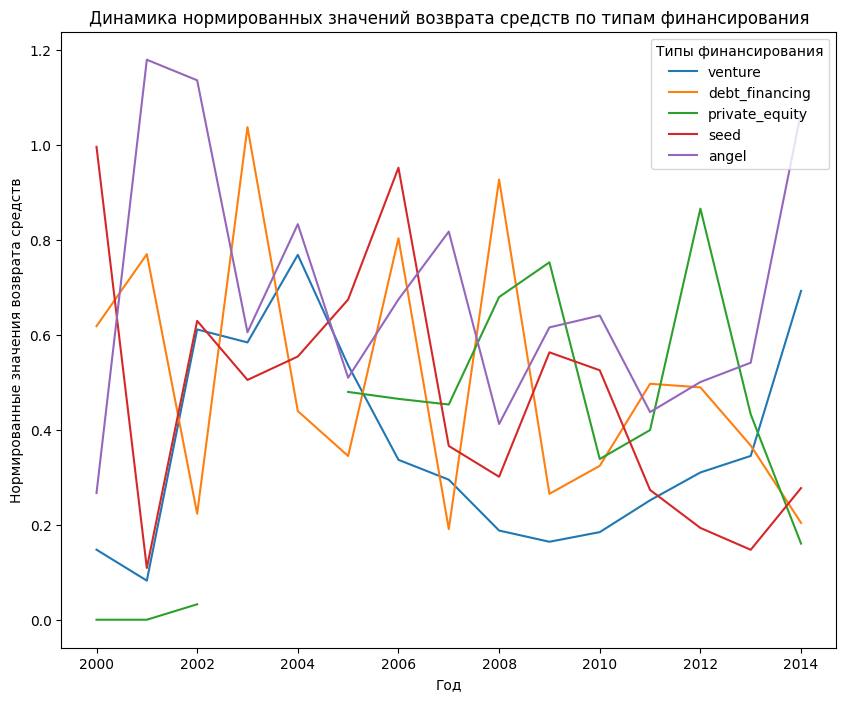

In [101]:
# Сохраняем в переменную указанные столбцы
column_list = ['venture', 'debt_financing', 'private_equity', 'seed', 'angel']

# Строим линейный график динамики нормированных значений возврата средств по типам финансирования
returns_shares[column_list].plot(kind='line',  figsize=(10, 8))
plt.title('Динамика нормированных значений возврата средств по типам финансирования')
plt.xlabel('Год')
plt.ylabel('Нормированные значения возврата средств')
plt.legend(title='Типы финансирования')
plt.show()

Сделайте вывод о том, в каких типах финансирования наблюдается наиболее устойчивый рост показателя.

Устойчивый рост наблюдается у типа `angel`, но только в последние 4 года исследуемого периода (с 2011 по 2014). И у `venture`, но только в последние 6 из 15 изучаемых лет (с 2009 по 2014).


## Шаг 5. Итоговый вывод и рекомендации

Представьте, что на календаре 2015 год. Опираясь на результаты анализа, дайте рекомендацию заказчику:

* в какую отрасль стоит инвестировать;
* какой тип финансирования при этом будет наиболее уместным.

Подведите итоги проекта:
* опишите, какие шаги были выполнены;
* какие выводы удалось сделать;
* насколько выводы согласуются между собой или, наоборот, вызывают сомнения.



В данном проекте был проведён исследовательский анализ компаний, объёмов и типов привлечённых инвестиций, статистики по возвратам средств на основе исторических данных до 2014 года. 

В рамках проекта выполнены следующие этапы:

- подготовлены к исследованию два датасета: об инвестировании стартапов и о возвратах инвестиционных вложений;
- исследованы динамика и структура финансирования стартапов в период до 2014 года.

Перечислим основные факты, полученные в результате исследовательских задач и попробуем ответить на вопросы по оценке инвестиционных стратегий:

<b>Исследование групп по срокам финансирования<b>:

- Преобладание единичного финансирования: 58.9% компаний получили единичное финансирование, это самая массовая категория среди всех компаний, то есть большинство компаний не привлекают дополнительные инвестиции после первого раунда.
- Умеренная доля долгосрочного финансирования: треть компаний имеют финансирование более года, это вторая по величине категория. Этот факт показывает, что существенная часть компаний привлекает инвестиции на длительный срок.
- Небольшая доля краткосрочного финансирования - только 11% компаний имеют финансирование до года.
- По объему инвестиций наблюдается изменение структуры распределения долей: в категории единичного финансирования доля снизилась до 30.6%, категория долгосрочного финансирования значительно выросла до 61.9%, краткосрочное финансирование осталось на самом низком из трёх категорий уровне.
- Таким образом, компании с долгосрочным финансированием привлекают более 60% всех инвестиций. Несмотря на то, что компаний с единичным финансированием больше (58.9%), они получают меньше инвестиций (30.6%).

<b>Исследование групп сегментов рынка (отраслей), в которых стартапы осуществляют свою деятельность<b>:

Можно отметить доминирование нишевых сегментов - 73.4% компаний работают в них. Это свидетельствует о высокой степени специализации рынка - большинство компаний фокусируются на узких рыночных нишах.
   
<b>Расчёт "обычного" для рассматриваемого периода размер средств, который предоставлялся компаниям:<b>

"Обычный" объём инвестирования для большинства компаний находится в диапазоне от 350 000 до 10 000 000 долларов, с медианным значением в 2 миллиона долларов.

<b>Анализ сегментов с аномальным финансированием:<b>:

1. Доминирование технологических и цифровых сегментов:
   - В топ-15 вошли такие направления, как облачные вычисления, SaaS, big data, интернет и видео. Это свидетельствует о растущем интересе инвесторов к технологиям, способным трансформировать бизнес-процессы и создавать новые рынки.
   - Сегменты, связанные с цифровизацией (cloud computing, SaaS, big data), занимают ключевые позиции, что отражает глобальный тренд на внедрение IT-решений в различные отрасли.
2. Роль креативных и нишевых направлений:
   - Развлечения (entertainment), фотография и нишевые рынки также вошли в топ. Это указывает на потенциал сегментов, ориентированных на уникальные потребности и эмоциональные запросы потребителей.
   - Нишевые рынки занимают 11-е место, что подтверждает их значимость для инвесторов, ищущих нестандартные возможности.
3. Традиционные отрасли с инновационным потенциалом:
   - Недвижимость лидирует с долей 0.1720
   - Консалтинг входит в топ-3 сегментов
   - Путешествия показывают интерес инвесторов
4. Включение маркетплейсов в топ-15 отражает растущий интерес инвесторов к платформам, объединяющим продавцов и покупателей. Этот тренд связан с динамичным развитием электронной коммерции и трансформацией розничной торговли. 

<b>Исследование типов финансирования по объёму и популярности:<b>

1. Доминирование венчурного финансирования:
   Венчурные инвестиции лидируют с долей более 72% от общего объёма финансирования. Это указывает на высокий спрос на капитал для стартапов и технологических проектов, особенно на ранних стадиях развития. 

2. Значимость долгового финансирования:
   Долговое финансирование (7.7%) и частные инвестиции (4.9%) занимают второе и четвёртое места соответственно. Это свидетельствует о востребованности инструментов, сочетающих умеренный риск и стабильный доход. 

3. Потенциал малых типов финансирования:
   Менее значимые типы (гранты, краудфандинг, конвертируемые ноты) в сумме составляют около 3.5% от общего объёма. Несмотря на скромные доли, они играют важную роль в экосистеме стартапов и социальных проектов. 

<b>Часто используемые типы финансирования, которые при этом характеризуются небольшими объёмами:<b> 
- инвестиции от бизнес-ангелов (`angel`) и
- гранты (`grant`).

<b>Типы финансирования, что встречаются редко, но при этом характеризуются значительным объёмом предоставленных сумм:<b>
- финансирование после IPO (`post_ipo_equity`) и
- долговое финансирование после IPO (`post_ipo_debt`).

Бизнес-ангелы и гранты играют ключевую роль на ранних стадиях развития стартапов, обеспечивая начальный капитал для исследований, разработки продукта и выхода на рынок. Эти инструменты помогают преодолеть «долину смерти», когда проекты ещё не привлекательны для крупных инвесторов. Бизнес-ангелы и гранты часто выступают «катализаторами», предоставляя не только деньги, но и экспертизу, менторство и доступ к сети контактов. Инвестиции в стартапы через бизнес-ангелов и гранты сопряжены с высоким риском, но могут принести кратную доходность при успешном выходе (например, через поглощение или IPO). 

IPO-финансирование (`post_ipo_equity` и `post_ipo_debt`) становится значимым на поздних стадиях, когда компании достигают зрелости и нуждаются в масштабных ресурсах для экспансии или реструктуризации. IPO-механизмы ориентированы на привлечение капитала для масштабирования, укрепления репутации и диверсификации рисков. IPO-финансирование менее рискованно, но требует значительных ресурсов и времени на подготовку, а также не гарантирует высокой доходности из-за рыночных колебаний. 

<b>Анализ соотношения типов финансирования по суммарным возвратам:<b>

- Доминирование венчурного финансирования - лидер по доходности, превосходит все остальные типы финансирования в несколько раз, подтверждает эффективность вложений в стартапы и инновационные проекты.

- Значимость долгового и частного финансирования: долговое финансирование показывает второй результат, `private equity` занимает третье место - эти типы демонстрируют стабильную доходность.

- Потенциал ранних стадий: посевные инвестиции показывают хороший результат, ангельские инвестиции также демонстрируют достойную доходность.

- Низкие показатели некоторых типов: IPO-финансирование показывает относительно низкие результаты, краудфандинг и вторичный рынок имеют минимальные показатели, гранты не показали положительной доходности.

<b>Иследование динамики предоставления финансирования по годам:<b>

1. Пиковые показатели:

- 2005 год — максимум по размеру инвестиционных средств в рамках одного раунда
- 2013 год — пик по общему числу раундов за весь период наблюдения
- 2014 год — снижение активности по количеству раундов, но рост по размеру инвестиций

2. Анализ ситуации в 2014 году:

Снижение количества раундов:
  - Возвращение к показателям 2011 года
  - Отклонение от растущей тенденции 2000-2013
  - Возможное насыщение рынка или перегруппировка инвесторов

Увеличение размера инвестиций:
  - Восстановление до уровня 2009-2010 годов
  - Преодоление минимума 2013 года
  - Смещение фокуса на крупные сделки

<b>Исследование динамики размера общего финансирования по массовым сегментам рынка для растущих в 2014 году сегментов:<b>

1. Производство (`manufacturing`):
   - Нестабильный, но растущий тренд: чередование роста и падения указывает на цикличность отрасли, возможно, связанную с экономическими циклами или технологическими изменениями. Однако общий тренд на рост говорит о долгосрочном потенциале.
   - Факторы риска: волатильность может быть связана с зависимостью от макроэкономических условий, колебаний спроса на сырье или изменений в регуляторной среде.
2. Технологии (`technology`):
   - Высокая волатильность: Сильные скачки от года к году свидетельствуют о быстром развитии сектора, но также о высоких рисках. Это может быть связано с быстрыми технологическими изменениями, появлением новых игроков и устареванием существующих решений.
   - Умеренный долгосрочный рост: несмотря на колебания, сектор демонстрирует устойчивый рост за 15 лет, что делает его привлекательным для долгосрочных инвестиций с учетом диверсификации.
3. Медицинский сектор (`medical`):
   - Резкий рост в 2013–2014: возможно, связан с инновациями в области медицинских технологий, увеличением государственных инвестиций в здравоохранение или глобальными трендами, такими как старение населения.
   - Потенциал для роста: сектор приближается по динамике к технологиям, что указывает на его растущую значимость. Он менее волатилен, чем технологии и более стабилен, чем производство.

<b>Исследование годовой динамики доли возвращённых средств по типам финансирования:<b>

- Венчурный сегмент демонстрирует устойчивый рост последние 6 лет. 
- Ангельские инвестиции показывают рост в последние 4 года. 
- Оба тренда указывают на восстановление доверия инвесторов к рисковым активам после финансового кризиса 2008-2009 годов

1. На основе анализа данных наиболее перспективными являются следующие отрасли:

<b>Технологические компании (облачные вычисления, SaaS, big data):<b>

Доминируют в топ-15 сегментов

Демонстрируют высокий потенциал роста

Соответствуют глобальным трендам цифровизации

Требуют активного мониторинга технологических изменений

<b>Медицинские технологии:<b>

Показывают стабильный рост

Поддерживаются глобальными трендами (старение населения)

Имеют высокий потенциал инноваций

Менее волатильны по сравнению с технологиями

<b>Нишевые рынки:<b>

Занимают 73.4% рынка

Характеризуются высокой рентабельностью

Имеют меньшую конкуренцию

Позволяют достичь высокой маржинальности

2. Рекомендуемые типы финансирования
   
Для выбранных отраслей оптимальны следующие типы финансирования:

<b>Венчурное финансирование (для технологических и медицинских стартапов):<b>

Обеспечивает наибольший объем инвестиций (72% рынка)

Подходит для ранних стадий развития

Дает высокую потенциальную доходность

Позволяет привлечь экспертизу и связи

<b>Частные инвестиции:<b>

Особенно эффективны для зрелых технологических компаний

Обеспечивают стабильный доход

Подходят для масштабирования бизнеса

<b>Ангельские инвестиции:<b>

Оптимальны для нишевых проектов на ранней стадии

Позволяют диверсифицировать риски

Дают доступ к менторской поддержке